## Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
from matplotlib import rc
import math
from PIL import Image, ImageDraw

## Constants

In [137]:
DIR = "/mnt/perkinsdata/tongue_STOmics/benchmarking/25_2k_4"
FILE = "accuracy.csv"

ALGOS = ["Watershed", "Cellpose", "DeepCell"]

In [23]:
# make output dir
OUTPUT = os.path.join(DIR, "plots")
!mkdir $OUTPUT

mkdir: cannot create directory ‘/mnt/perkinsdata/tongue_STOmics/benchmarking/25_2k_4/plots’: File exists


In [138]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], "size": 14})
rc('text', usetex=True)

## Load Data

In [139]:
data = pd.read_csv(os.path.join(DIR, FILE))
data

ID TF_FT    F1_m    F1_s   IoU_m   IoU_s  Precision_m  Precision_s  \
0  watershed    tf  0.6465  0.1993  0.5082  0.2094       0.7472       0.3263   
1   cellpose    tf  0.8567  0.1719  0.7769  0.1861       0.8815       0.2018   
2   deepcell    tf  0.4644  0.2518  0.3361  0.2066       0.3563       0.2135   
3  watershed    ft  0.7293  0.1360  0.5911  0.1613       0.6669       0.1518   
4   cellpose    ft  0.8643  0.1755  0.7885  0.1814       0.8678       0.1748   
5   deepcell    ft  0.6360  0.1012  0.4741  0.1057       0.9232       0.0860   

   Recall_m  Recall_s  Entropy_w_m  Entropy_w_s  Entropy_wo_m  Entropy_wo_s  
0    0.6750    0.1524       1.0179       0.3597        0.7583        0.3105  
1    0.8588    0.1780       0.5041       0.4596        0.3550        0.3328  
2    0.7477    0.3510       0.3277       0.3385        0.1788        0.2091  
3    0.8860    0.2179       0.3592       0.6698        0.2909        0.5700  
4    0.8899    0.1973       0.3212       0.3457        0.2168        0.2443  
5    0.5005    0.1251       1.2473       0.3143        0.8809        0.3707

In [140]:
# get plotting data from data
def get_X_means_stds(measures):
    means = []
    stds = []

    for m in measures:
        means.append(list(data[data["TF_FT"] == m[0]][m[1] + "_m"]))
        stds.append(list(data[data["TF_FT"] == m[0]][m[1] + "_s"]))
    X = np.arange(len(measures))
    
    return (X,means,stds)

## Plotting measures
Functions and plots for OZ SC conf.

In [27]:
X,means,stds = get_X_means_stds([("tf", "Recall"), ("tf", "Precision"), ("ft", "Entropy_wo")])

In [141]:
def plot_by_algo(X, means, stds, filename, llabels, title, legend_above):
    fig, ax = plt.subplots()

    # set colour style
    plt.style.use('seaborn-colorblind')

    # set white background
    fig.patch.set_facecolor('white')
    #plt.rcParams["font.weight"] = "bold"
    # set im size
    fig.set_size_inches(5, 4.6)
    fig.set_dpi(500)

    # add bar plots
    ax.bar(X + 0.00, means[0], yerr=stds[0], align='center', capsize=10, width = 0.25)
    ax.bar(X + 0.25, means[1], yerr=stds[1], align='center', capsize=10, width = 0.25)
    ax.bar(X + 0.50, means[2], yerr=stds[2], align='center', capsize=10, width = 0.25)

    #ax.set_ylabel('Accuracy Measure')
    ax.set_xticks(X+0.25)
    ax.set_xticklabels(ALGOS)
    ax.set_title(title)
    ax.yaxis.grid(False)

    # legen
    if legend_above:
        ax.legend(labels=llabels, loc = "upper center", ncol = 3, bbox_to_anchor = (0.5, 1.14), fancybox=True, framealpha=1, edgecolor = "black")
    else:
        ax.legend(labels=llabels, bbox_to_anchor = (1.2, 1), fancybox=True, framealpha=1, edgecolor = "black")

    # Save the figure and show
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT, "x_method.pdf"), dpi = 500, format = "pdf", pad_inches = 0, bbox_inches = "tight")
    plt.show()

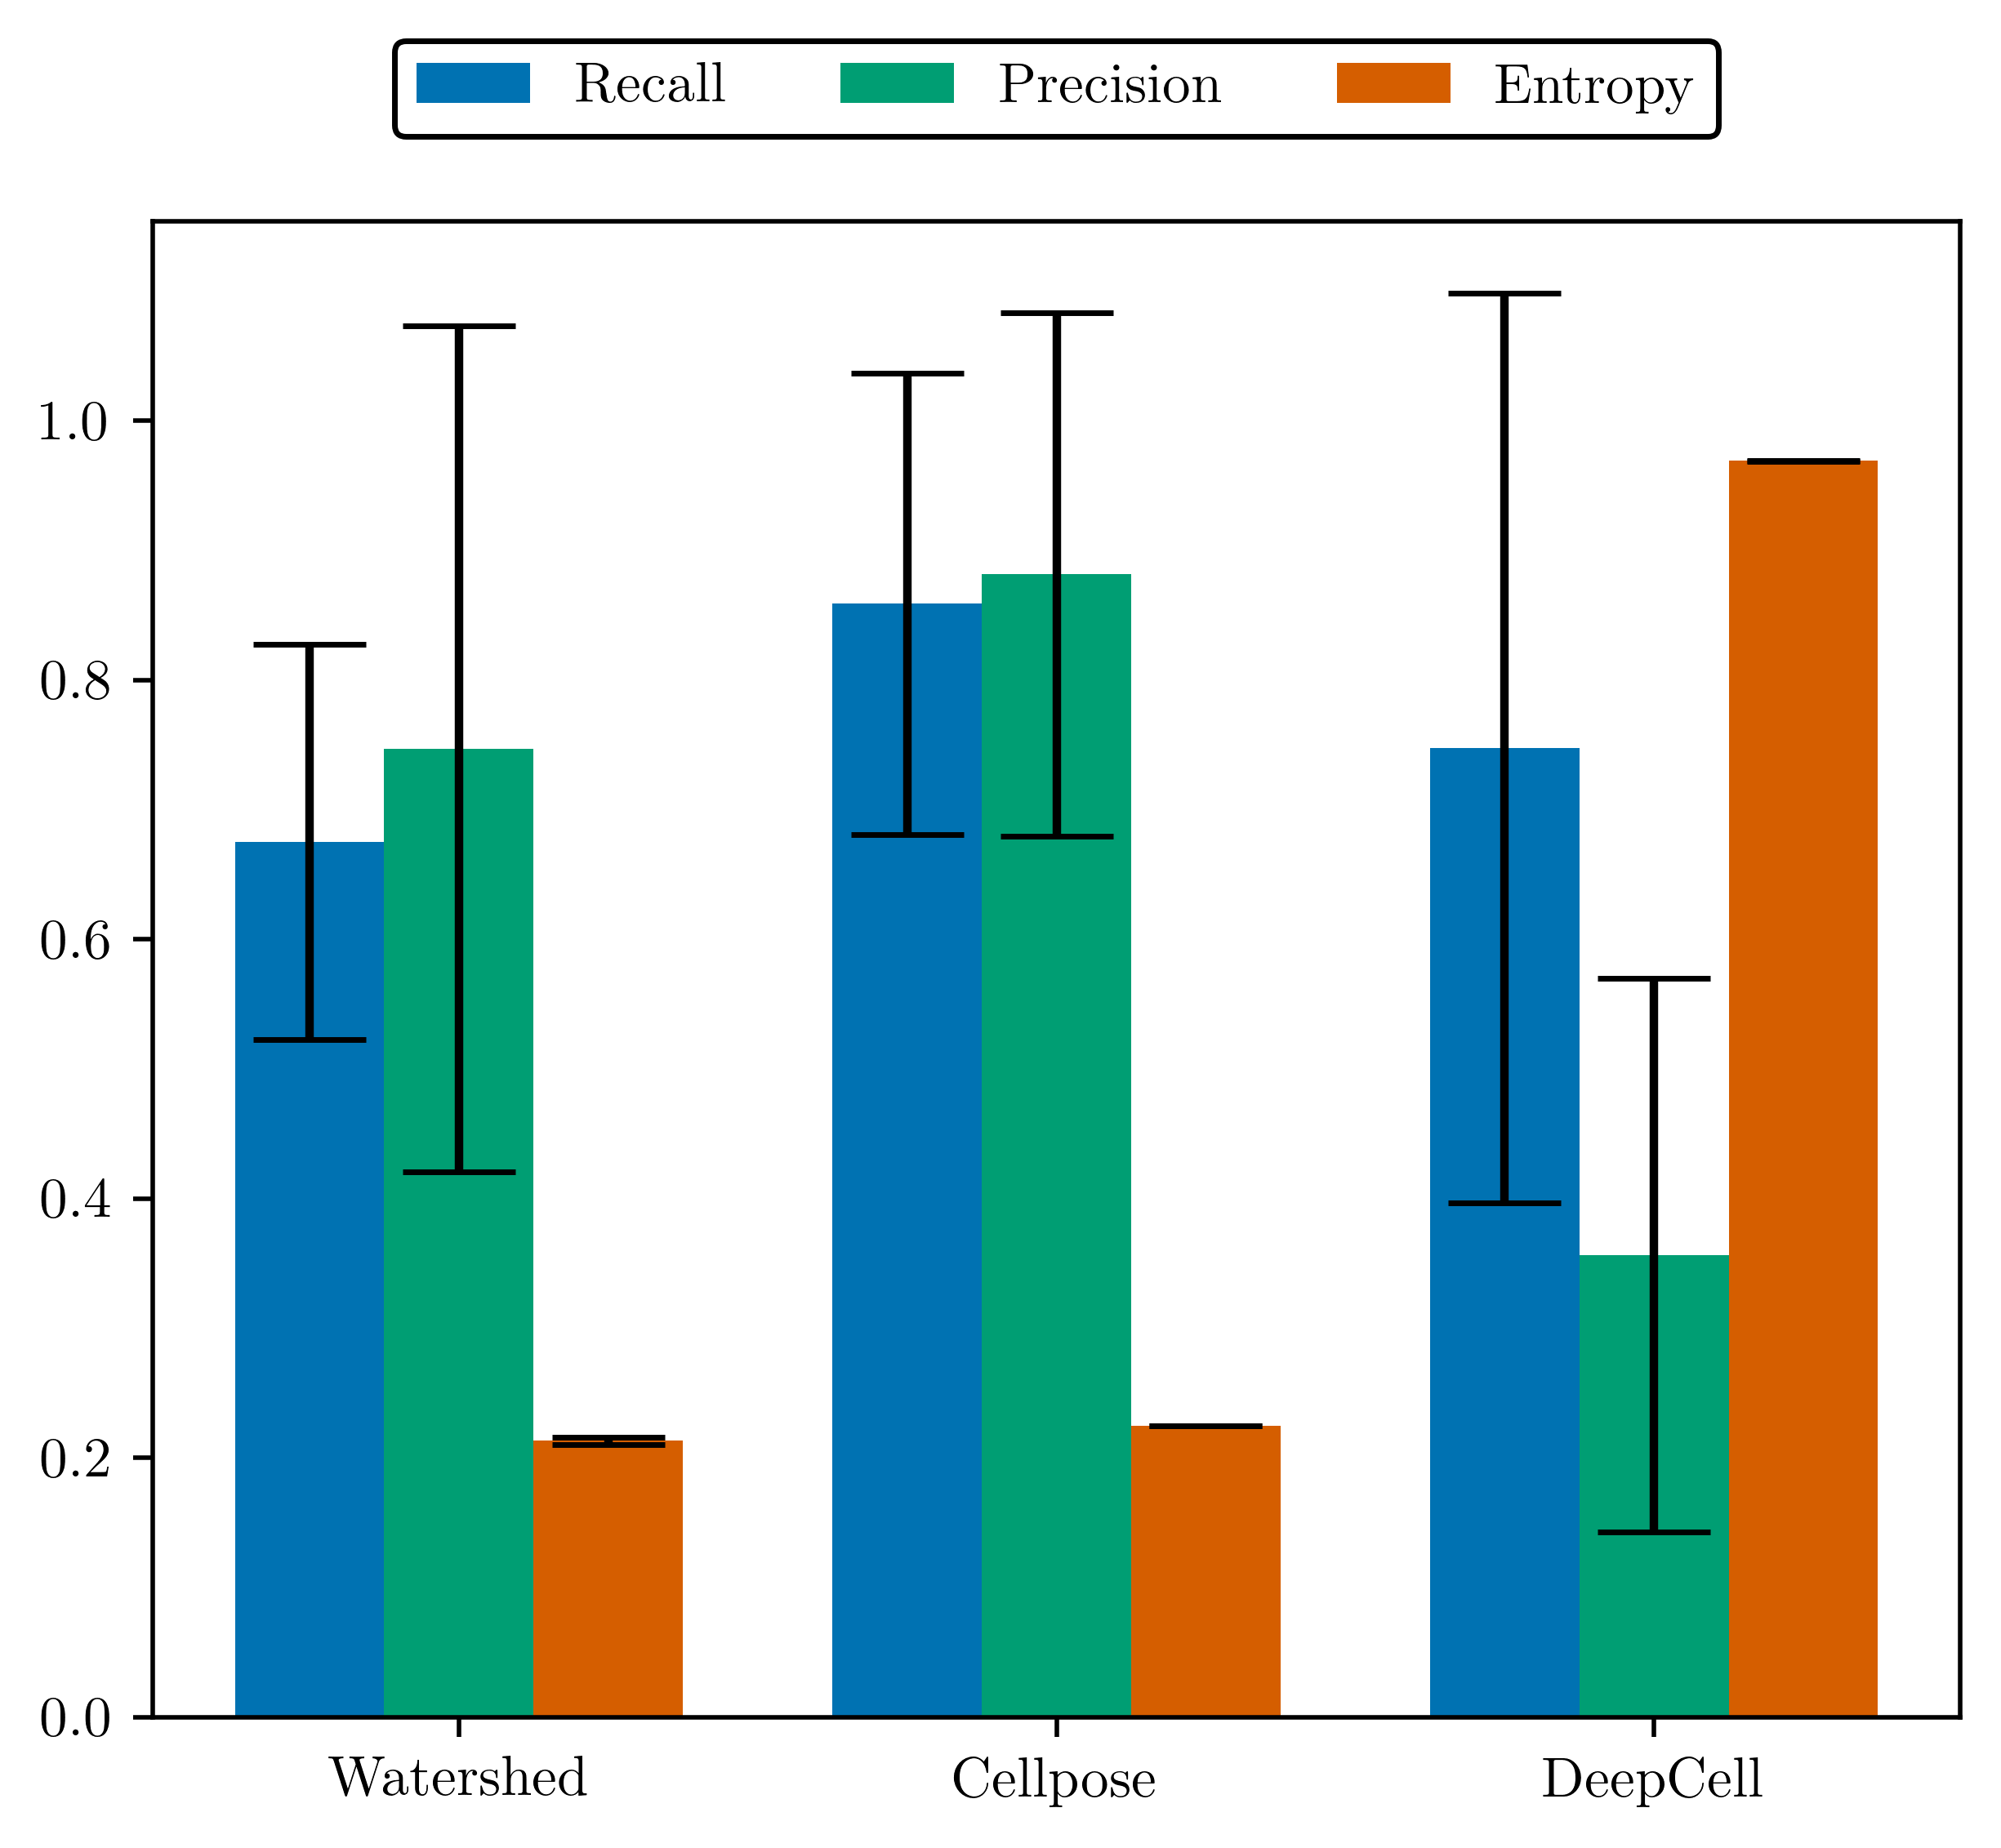

In [20]:
plot_by_algo(X, means, stds, "x_accuracy.pdf", ['Recall', 'Precision', "Entropy"], None, True)

In [160]:
means_t = np.array(means).T
stds_t = np.array(stds).T

In [161]:
np.max(means_t+stds_t)

1.3776000000000002

In [165]:
def plot_by_metric(X, means, stds, filename, xlabels, title, size = (5,4), dpi = 500, 
                   legend_offset = True, legend = True, xticks = True):
    fig, ax = plt.subplots()

    # set colour style
    plt.style.use('seaborn-colorblind')

    # set white background
    fig.patch.set_facecolor('white')

    # tranpose means and stds
    means_t = np.array(means).T
    stds_t = np.array(stds).T

    # set im size
    fig.set_size_inches(*size)
    fig.set_dpi(dpi)

    # add bar plots
    ax.bar(X + 0.00, means_t[0], yerr=stds_t[0], align='center', capsize=5, width = 0.25)
    ax.bar(X + 0.25, means_t[1], yerr=stds_t[1], align='center', capsize=5, width = 0.25)
    ax.bar(X + 0.50, means_t[2], yerr=stds_t[2], align='center', capsize=5, width = 0.25)

    ax.set_ylabel('Accuracy Measure')
    if xticks:
        ax.set_xticks(X+0.25)
        ax.set_xticklabels(xlabels)
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
    ax.set_title(title)
    ax.yaxis.grid(False)
    plt.ylim(0, np.max(means_t+stds_t)+0.05)
    if legend:
        if legend_offset:
            ax.legend(labels=ALGOS, bbox_to_anchor=(1.12, 1), fancybox=True, framealpha=1, edgecolor = "black")
        else:
            ax.legend(labels = ALGOS, fancybox=True, framealpha=1, edgecolor = "black", prop={'size': 12})
    # Save the figure and show
    plt.tight_layout()
    if filename is not None:
        plt.savefig(os.path.join(OUTPUT, filename), dpi = dpi, format = "pdf", pad_inches = 0, bbox_inches = "tight")
    plt.show()

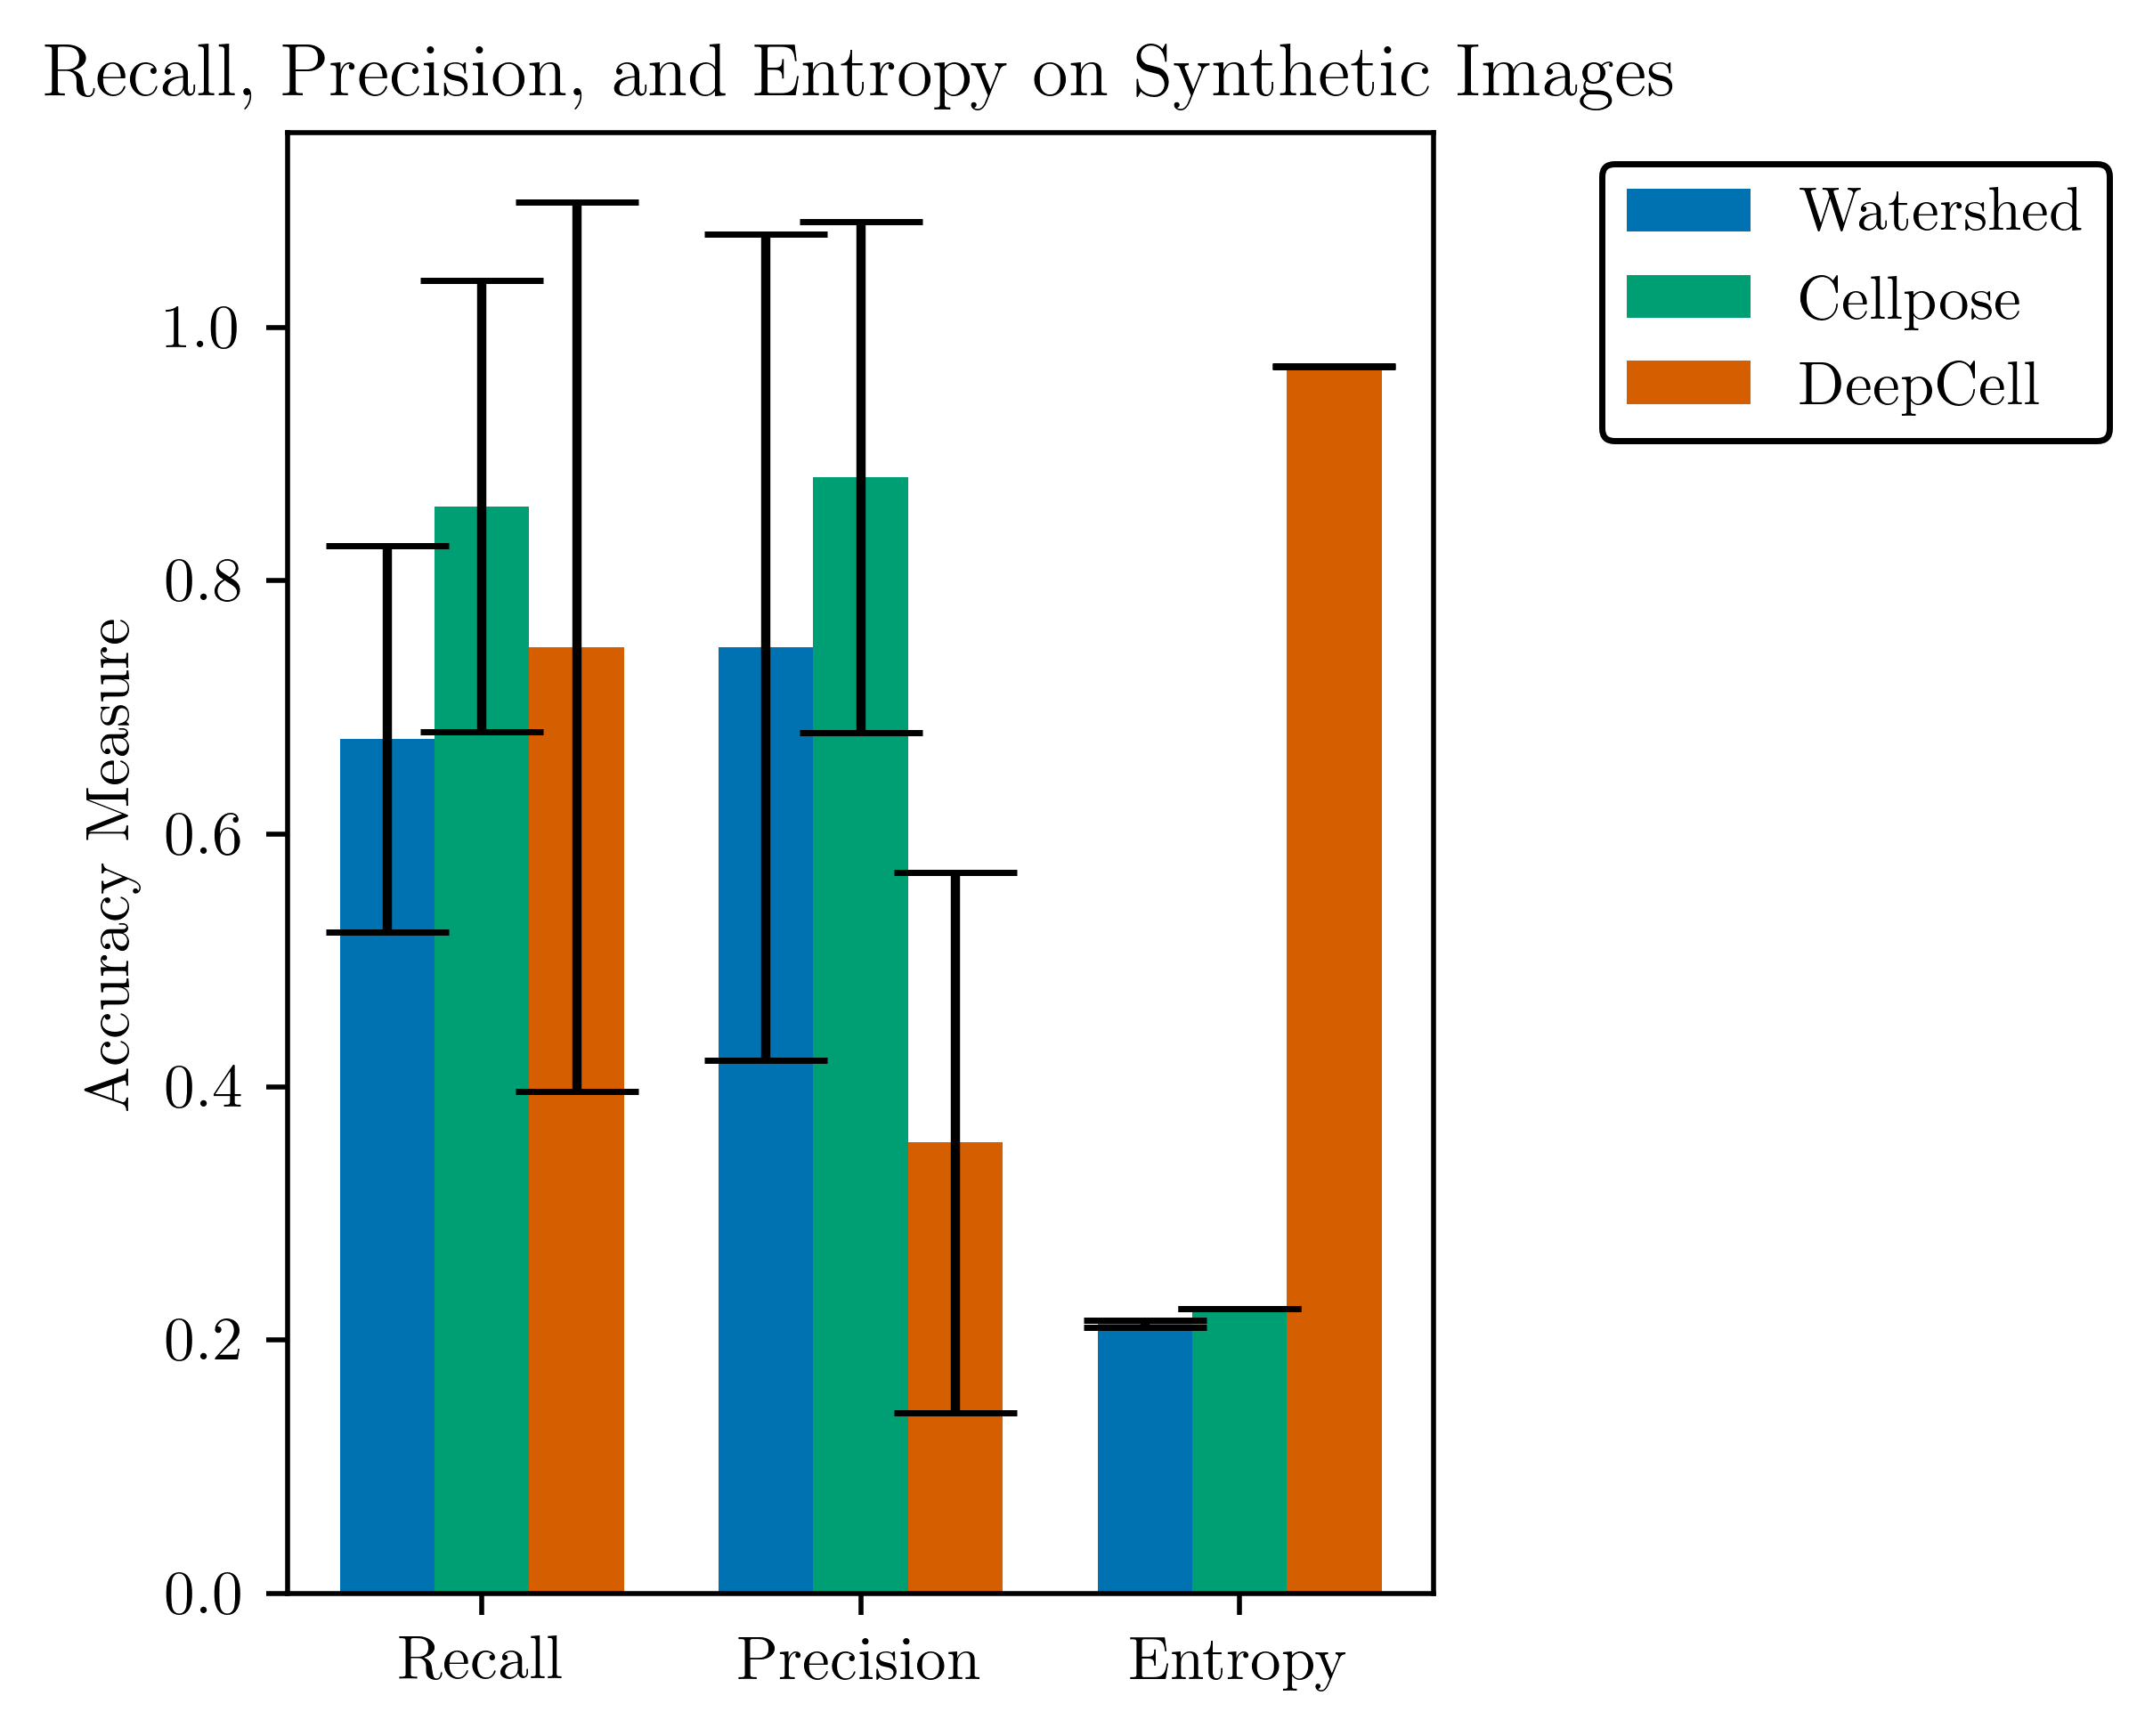

In [29]:
plot_by_metric(X, means, stds, "x_method.pdf", ['Recall', 'Precision', "Entropy"],
               'Recall, Precision, and Entropy on Synthetic Images')

## Plotting all measures

In [158]:
measures = [("tf", "F1"), ("tf", "IoU"), ("tf", "Recall"), ("tf", "Precision"), ("tf", "Entropy_w"), ("tf", "Entropy_wo")]
names = [x[1].replace("_wo", " w/out\nBackground").replace("_w", " w/\nBackground") for x in measures]

X,means,stds = get_X_means_stds(measures) 

In [166]:
plot_by_metric(X, means, stds, "tf_all.pdf", names, None, size = (10,6), dpi = 1000, legend_offset = False)
plot_by_metric(X, means, stds, "tf_all_special.pdf", names, None, size = (10,6), dpi = 1000, legend_offset = False, xticks = False)

In [167]:
measures = [("ft", x[1]) for x in measures]
names = [x[1].replace("_wo", " w/out\nBackground").replace("_w", " w/\nBackground") for x in measures]

X,means,stds = get_X_means_stds(measures) 
plot_by_metric(X, means, stds, "ft_all.pdf", names, None, size = (10,6), dpi = 1000, legend_offset = False)
plot_by_metric(X, means, stds, "ft_all_special.pdf", names, None, size = (10,6), dpi = 1000, legend_offset = False, legend = False)

## Plotting for seminar

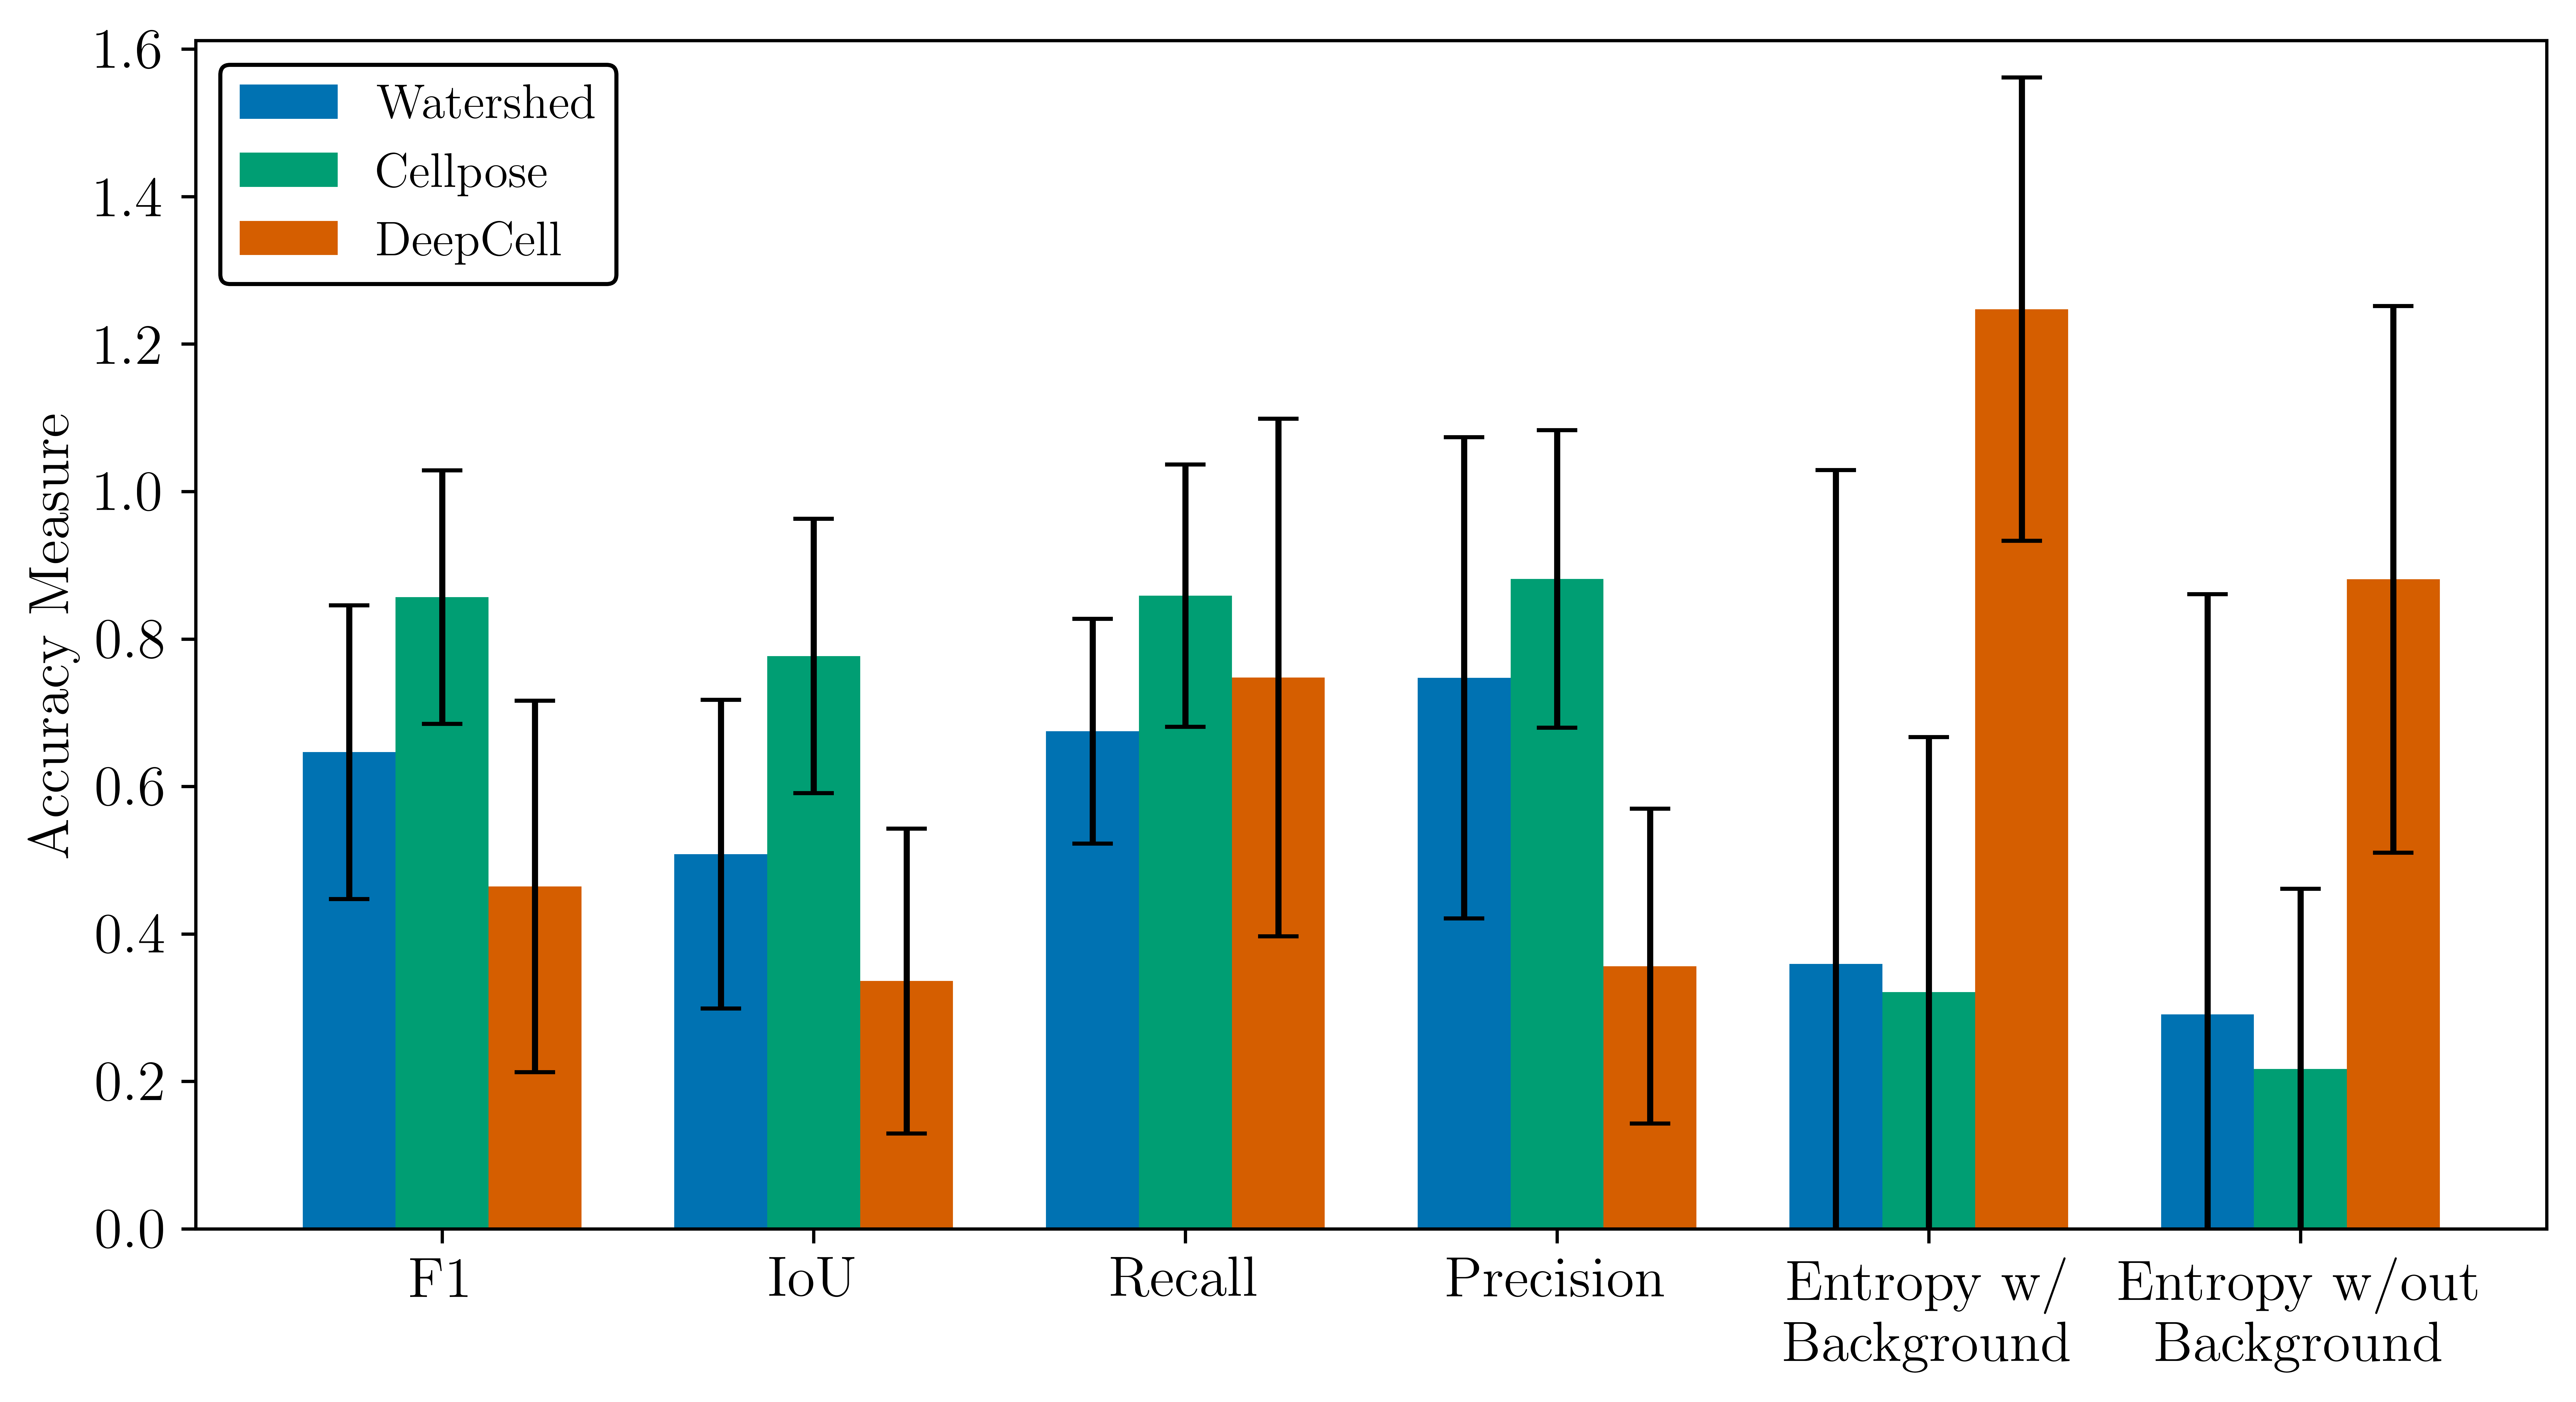

In [168]:
measures = [("tf", "F1"), ("tf", "IoU"), ("tf", "Recall"), ("tf", "Precision"), 
            ("ft", "Entropy_w"), ("ft", "Entropy_wo")]
names = [x[1].replace("_wo", " w/out\nBackground").replace("_w", " w/\nBackground") for x in measures]

X,means,stds = get_X_means_stds(measures)

plot_by_metric(X, means, stds, "results_seminar.pdf", names, None, size = (9,5), dpi = 1000, legend_offset = False)

# Giotto plotting
## Data directory and other constants

In [56]:
DIR = "/mnt/perkinsdata/tongue_STOmics/discovery/R_analysis/giotto"
FILE = "page.csv"
PLOTS = os.path.join(DIR, "tidy_plots")

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], "size": 32})
rc('text', usetex=True)

if not os.path.isdir(PLOTS):
    os.mkdir(PLOTS)

COLOURS = ["#F56867",    "#FEB915",    "#C798EE",    "#59BE86",    "#7495D3",
"#D1D1D1",    "#6D1A9C",    "#15821E",    "#3A84E6",    "#997273",
"#787878",    "#DB4C6C",    "#9E7A7A",    "#554236",    "#AF5F3C",
"#93796C",    "#F9BD3F",    "#DAB370",    "#877F6C",    "#268785"]

In [57]:
page = pd.read_csv(os.path.join(DIR, FILE))
page["sdimy"] = page["sdimy"]-np.min(page["sdimy"])
page["sdimx"] = page["sdimx"]-np.min(page["sdimx"])
page.head()

cell_ID  Epithelial (anterior column)  Epithelial (basal)  \
0  BIN.10000_                     -0.078084           -1.670683   
1  BIN.10001_                      0.002022           -1.295974   
2  BIN.10002_                     -0.080052           -1.429073   
3  BIN.10003_                      0.086303           -1.624534   
4  BIN.10004_                     -0.084979           -1.785626   

   Epithelial (interpapillary)  Epithelial (posterior column)  \
0                    -0.133849                      -0.180379   
1                    -0.003308                      -0.185513   
2                     0.099918                      -0.076403   
3                    -0.066635                      -0.179820   
4                    -0.005746                      -0.080507   

   Epithelial replicating  Fibroblast    Immune  Lymphatic endothelial  \
0               -0.250723   -0.019045 -0.182178               0.018997   
1               -0.259013    0.319495 -0.123848              -0.155852   
2               -0.330527    0.048102 -0.186233              -0.119394   
3               -0.128125   -0.018311 -0.181310              -0.048062   
4               -0.393233    0.044980 -0.128601              -0.161018   

   Mast cells  ...  Schwann cells  Skeletal muscle  Taste cells  \
0    0.458469  ...       0.183826        -1.080077     0.197630   
1    0.727412  ...       0.088764        -1.106355     0.199831   
2   -0.055492  ...       0.089796        -0.808585     0.200809   
3    0.160009  ...       0.089051        -0.988360     0.198085   
4    0.162037  ...       0.088720        -1.018913     0.201616   

   Vascular endothelial  Vascular smooth muscle cells  sdimx  sdimy  \
0             -0.637945                      0.128834     32     15   
1             -0.652544                      0.129759     32     16   
2             -0.650248                      0.130768     32     17   
3             -0.637078                      0.129289     32     18   
4             -0.567138                      0.130394     32     19   

                           ranks          max                           norm  
0                     Mast cells   Mast cells                     Mast cells  
1                     Mast cells   Mast cells                     Mast cells  
2  Epithelial (posterior column)  Taste cells  Epithelial (posterior column)  
3   Epithelial (anterior column)  Taste cells   Epithelial (anterior column)  
4                     Mast cells  Taste cells                     Mast cells  

[5 rows x 21 columns]

## Violin plots

In [119]:
cts = list(page.columns[1:-5])
combined = [list(page[ct]) for ct in cts]

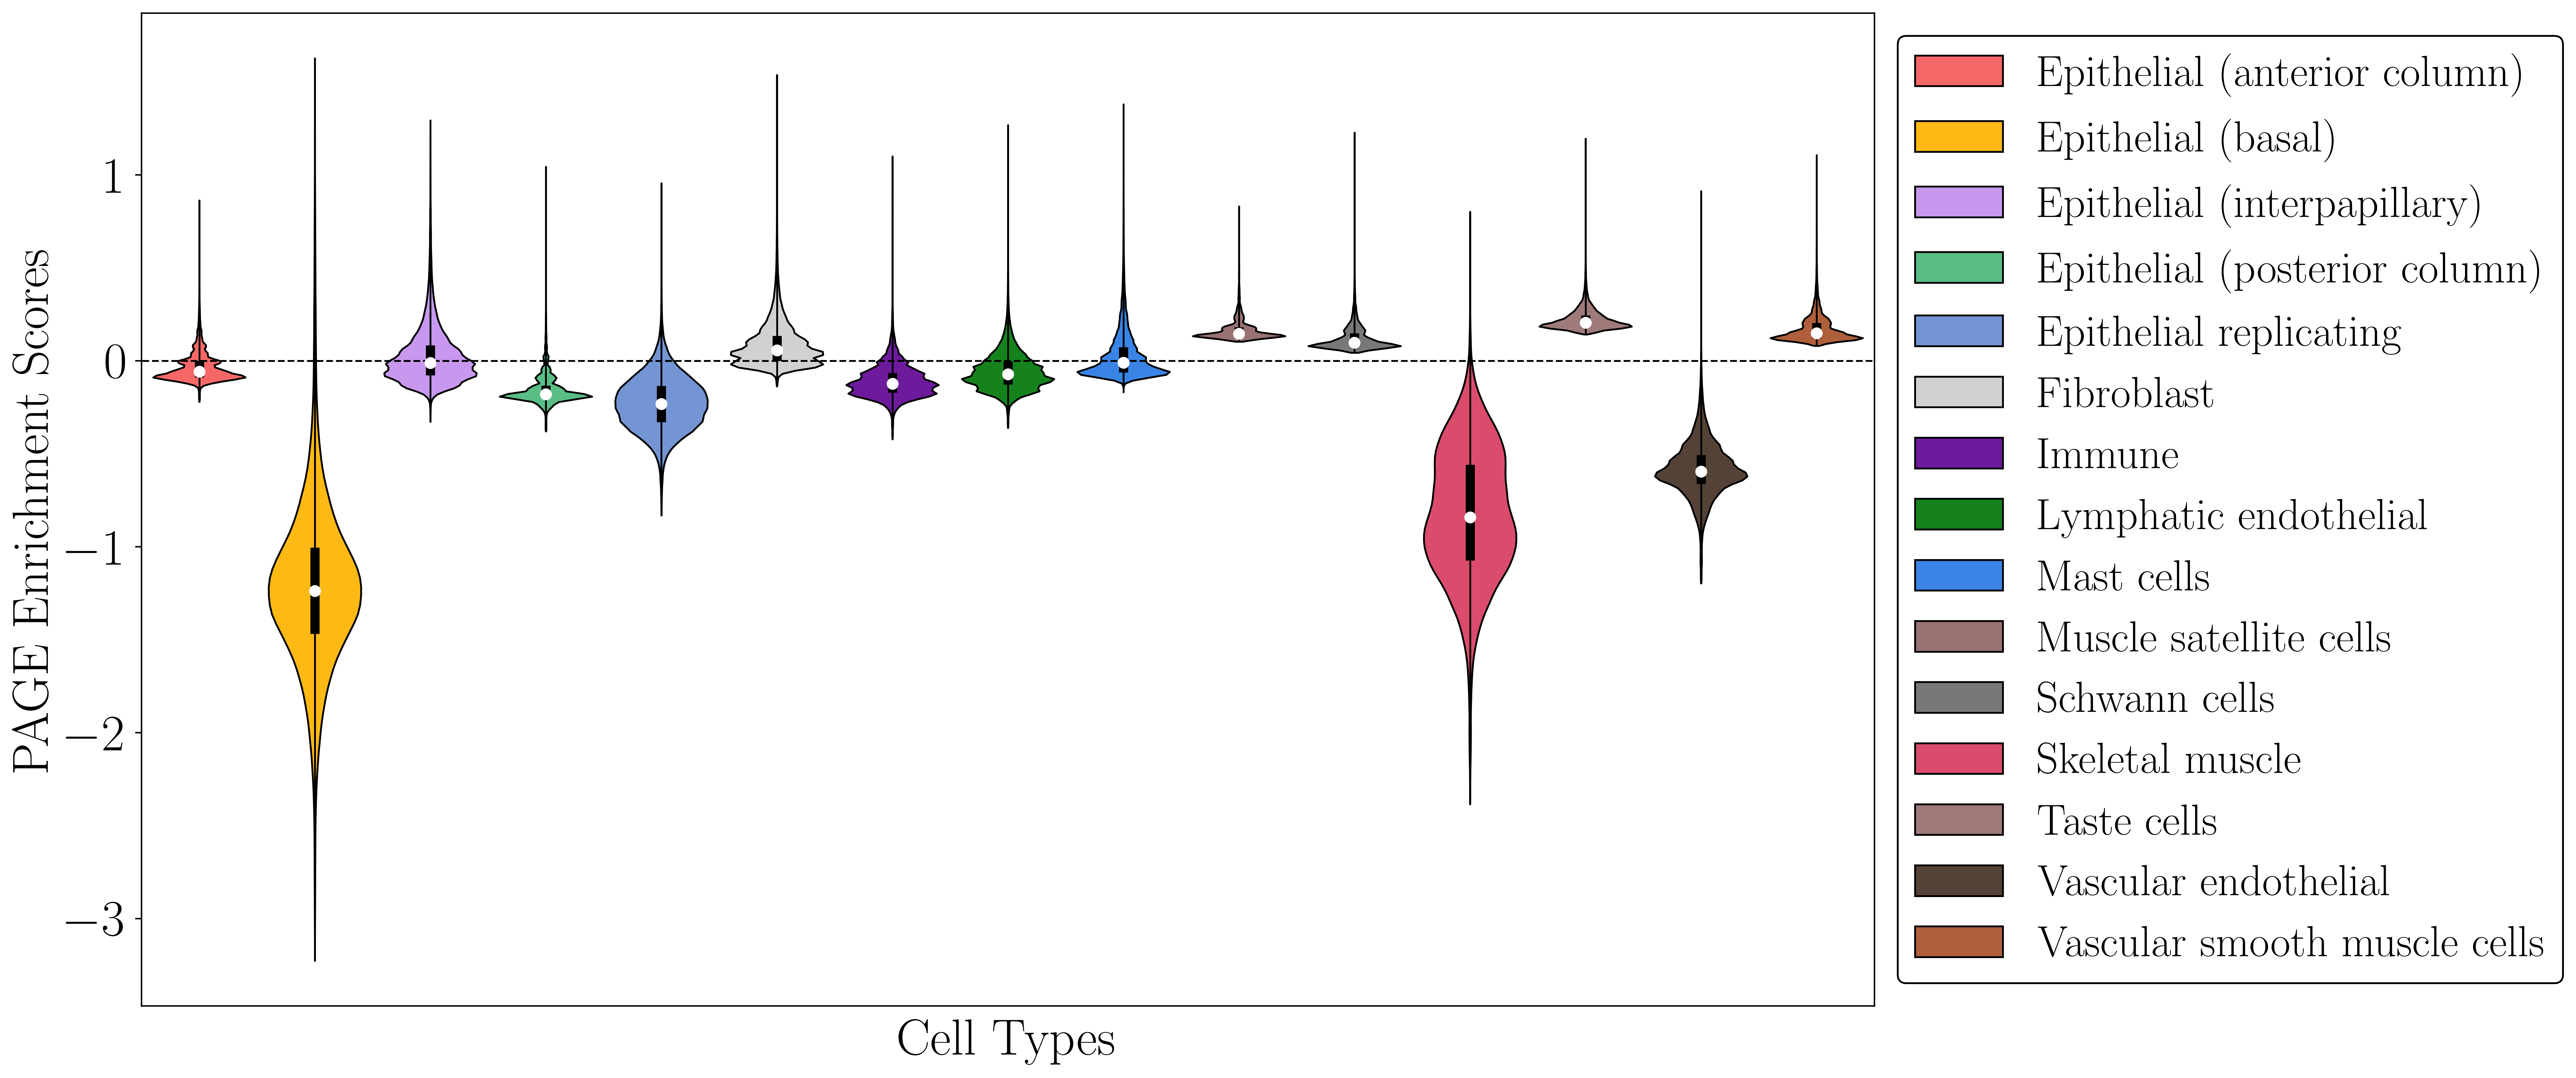

In [136]:
# Create a figure and ax instance
fig, ax = plt.subplots()

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], "size": 28})
rc('text', usetex=True)

# Create the violin plot
violin_parts = ax.violinplot(combined, showmeans=False, showmedians=False,
        showextrema=False, widths = 0.8)

# set im size
fig.set_size_inches((17,10))
fig.set_dpi(500)

# colours
for (i,pc) in enumerate(violin_parts['bodies']):
    pc.set_color(COLOURS[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

# legend
ax.legend(labels = cts, fancybox=True, framealpha=1, edgecolor = "black",
          bbox_to_anchor=(1.41, 0.5), prop={'size': 24}, loc='center right')

# get quartiles # SRC: https://matplotlib.org/stable/gallery/statistics/customized_violin.html
quartile1, medians, quartile3 = np.percentile(combined, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)

ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.vlines(inds, np.min(combined, axis = 1), 
                np.max(combined, axis = 1), color='k', linestyle='-', lw=1)

# horizontal line at y = 0
plt.xlim(0.5, len(medians)+0.5)
ax.hlines(0, -0.5, len(medians)+0.5, color='k', linestyle='dashed', lw=1)

# no xticks
ax.set_xticks([])

# ylabel and title
ax.set_ylabel('PAGE Enrichment Scores')
ax.set_xlabel('Cell Types')
#ax.set_title()

plt.savefig(os.path.join(PLOTS, "violin.pdf"), dpi = 500, format = "pdf", pad_inches = 0, bbox_inches = "tight")
plt.show()

## Spatial CT plots
Plotting cell types spatially

### Individually
One set of cell-type annotations per plot

In [101]:
def plot_spatial_cts(name = "ranks", n = 5):
    cts_used, cts_num = np.unique(page[name], return_inverse=True)
    cts_num = cts_num +1
    # check mapping in correct order
    assert (cts_used == cts).all()
    
    new_dimy = np.max(page["sdimy"]) - page["sdimy"]
    size = (n*(np.max(new_dimy)+1), n*(np.max(page["sdimx"])+1))

    #page["new_sdimy"] = size[0] - 1 - page["sdimy"]*n
    arr = np.zeros(size) 
    for i in range(n):
        for j in range(n):
            arr[new_dimy*n+i, page["sdimx"]*n+j] = cts_num
            
    cm = matplotlib.colors.ListedColormap(["#FFFFFF"] + COLOURS[:len(cts_used)])

    fig, ax = plt.subplots()
    im = ax.imshow(arr, cmap = cm, interpolation="none")
    # set im size
    fig.set_size_inches(np.array(arr.shape)/50)
    fig.set_dpi(50)
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_cmap(cm)

    values = np.unique(cts_num)
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ matplotlib.patches.Patch(color=colors[i], label=cts[i] ) for i in range(len(values)) ]
    #ax.colorbar()
    ax.legend(handles=patches,fancybox=True, framealpha=1, edgecolor = "black",prop={'size': 24},bbox_to_anchor=(1.8, 0.5),  loc='center right')
    ax.axis('off')
    plt.savefig(os.path.join(PLOTS, name + ".pdf"), dpi = 50, format = "pdf", pad_inches = 0, bbox_inches = "tight")
    plt.show()

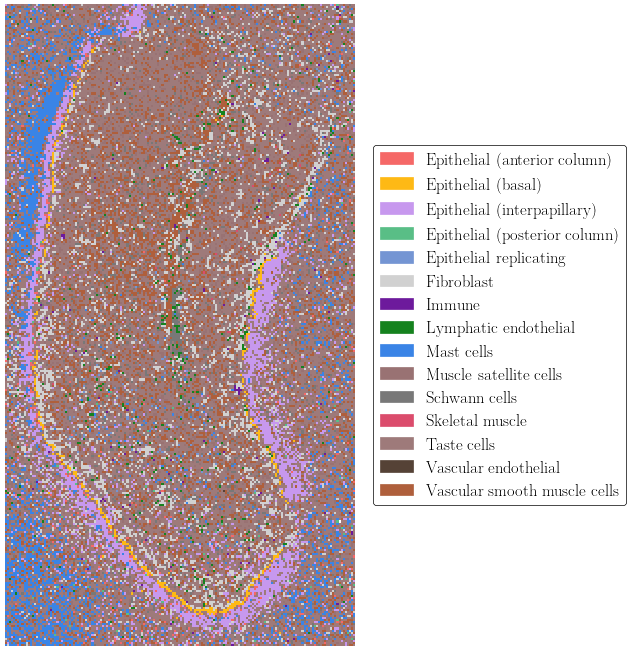

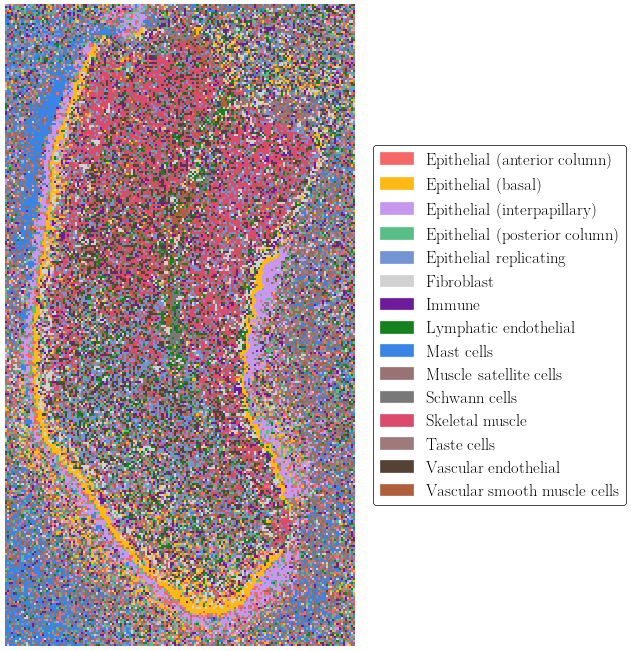

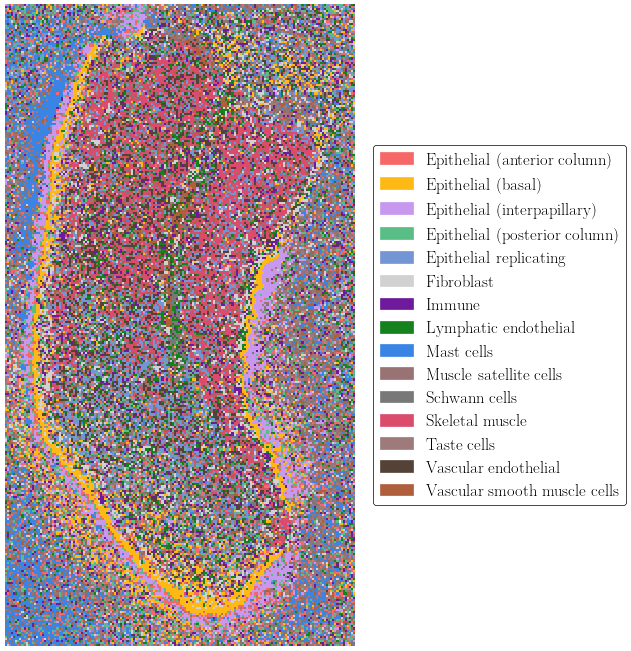

In [103]:
for name in ["max", "norm", "ranks"]:
    plot_spatial_cts(name)

### Plot three cell-type rankings in one image

In [105]:
# variables
names = ["max", "norm", "ranks"]
n = 5
border = 30
new_dimy = np.max(page["sdimy"]) - page["sdimy"]

# size of each plot and overall image size
plt_size = (n*(np.max(new_dimy)+1), (n*(np.max(page["sdimx"])+1)))
im_size = (plt_size[0], plt_size[1]*3+border*2)

# empty array
arr = np.zeros(im_size) 

# for each set of cell-types
for (name_i, name) in enumerate(names):
    # factorise
    cts_used, cts_num = np.unique(page[name], return_inverse=True)
    cts_num = cts_num +1
    # check mapping in correct order
    assert (cts_used == cts).all()
    
    # for each subpixel within a pixel - set to correct value
    for i in range(n):
        for j in range(n):
            arr[new_dimy*n+i, page["sdimx"]*n+j+name_i*(plt_size[1]+border)] = cts_num

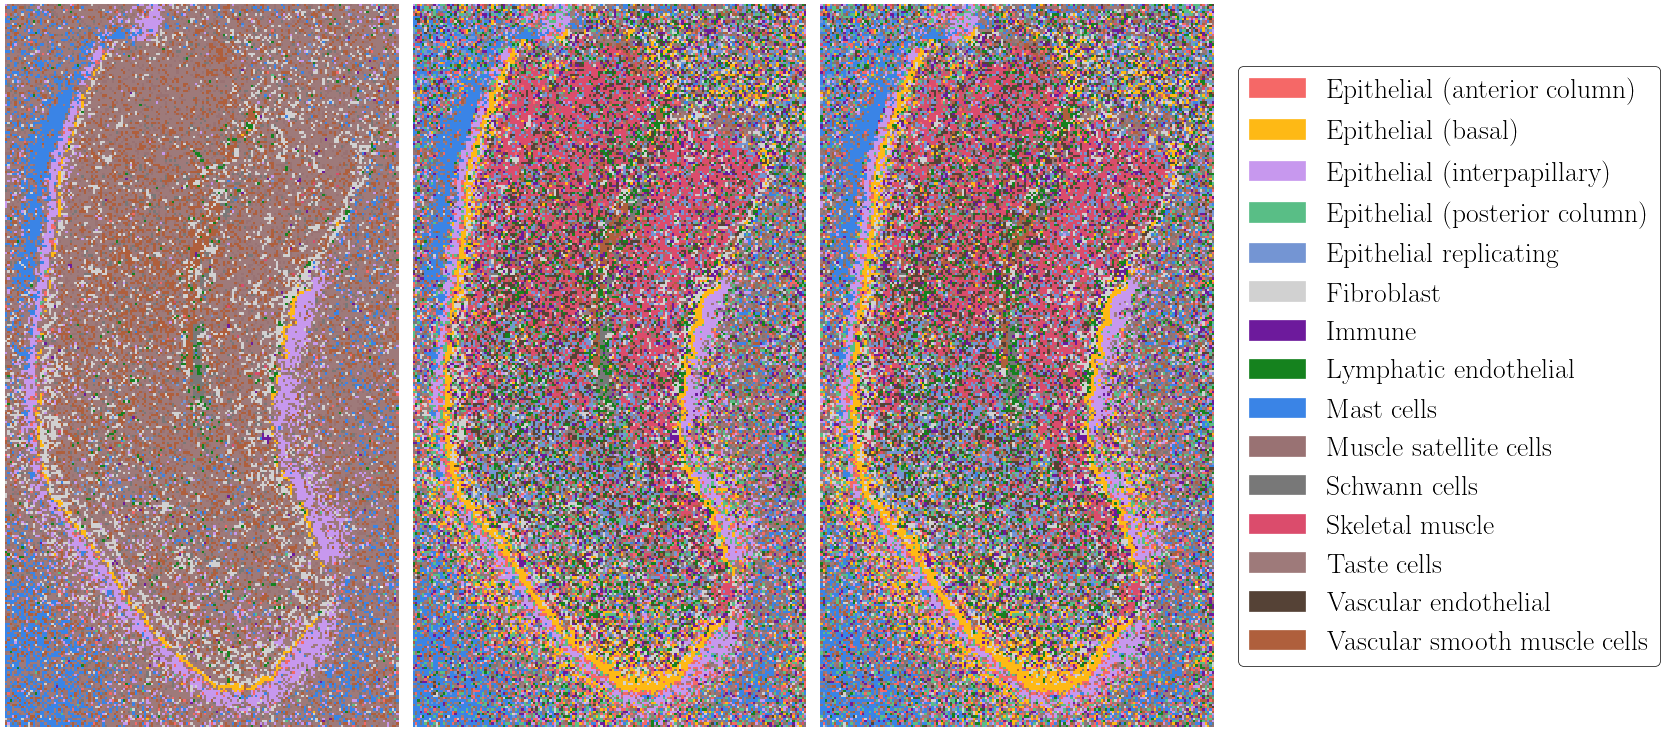

In [106]:
# colours
cm = matplotlib.colors.ListedColormap(["#FFFFFF"] + COLOURS[:len(cts_used)])

fig, ax = plt.subplots()
im = ax.imshow(arr, cmap = cm, interpolation="none")

# set im size
fig.set_size_inches(np.array(arr.shape)/50)
fig.set_dpi(50)

# no ticks
ax.set_xticks([])
ax.set_yticks([])

# legend
values = np.unique(cts_num)
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ matplotlib.patches.Patch(color=colors[i], label=cts[i] ) for i in range(len(values)) ]
ax.legend(handles=patches,fancybox=True, framealpha=1, edgecolor = "black",prop={'size': 40},bbox_to_anchor=(1.38, 0.5),  loc='center right')

ax.axis('off')

# save and show
plt.savefig(os.path.join(PLOTS, "all3.pdf"), dpi = 50, format = "pdf", pad_inches = 0, bbox_inches = "tight")
plt.show()

### Plot for seminar

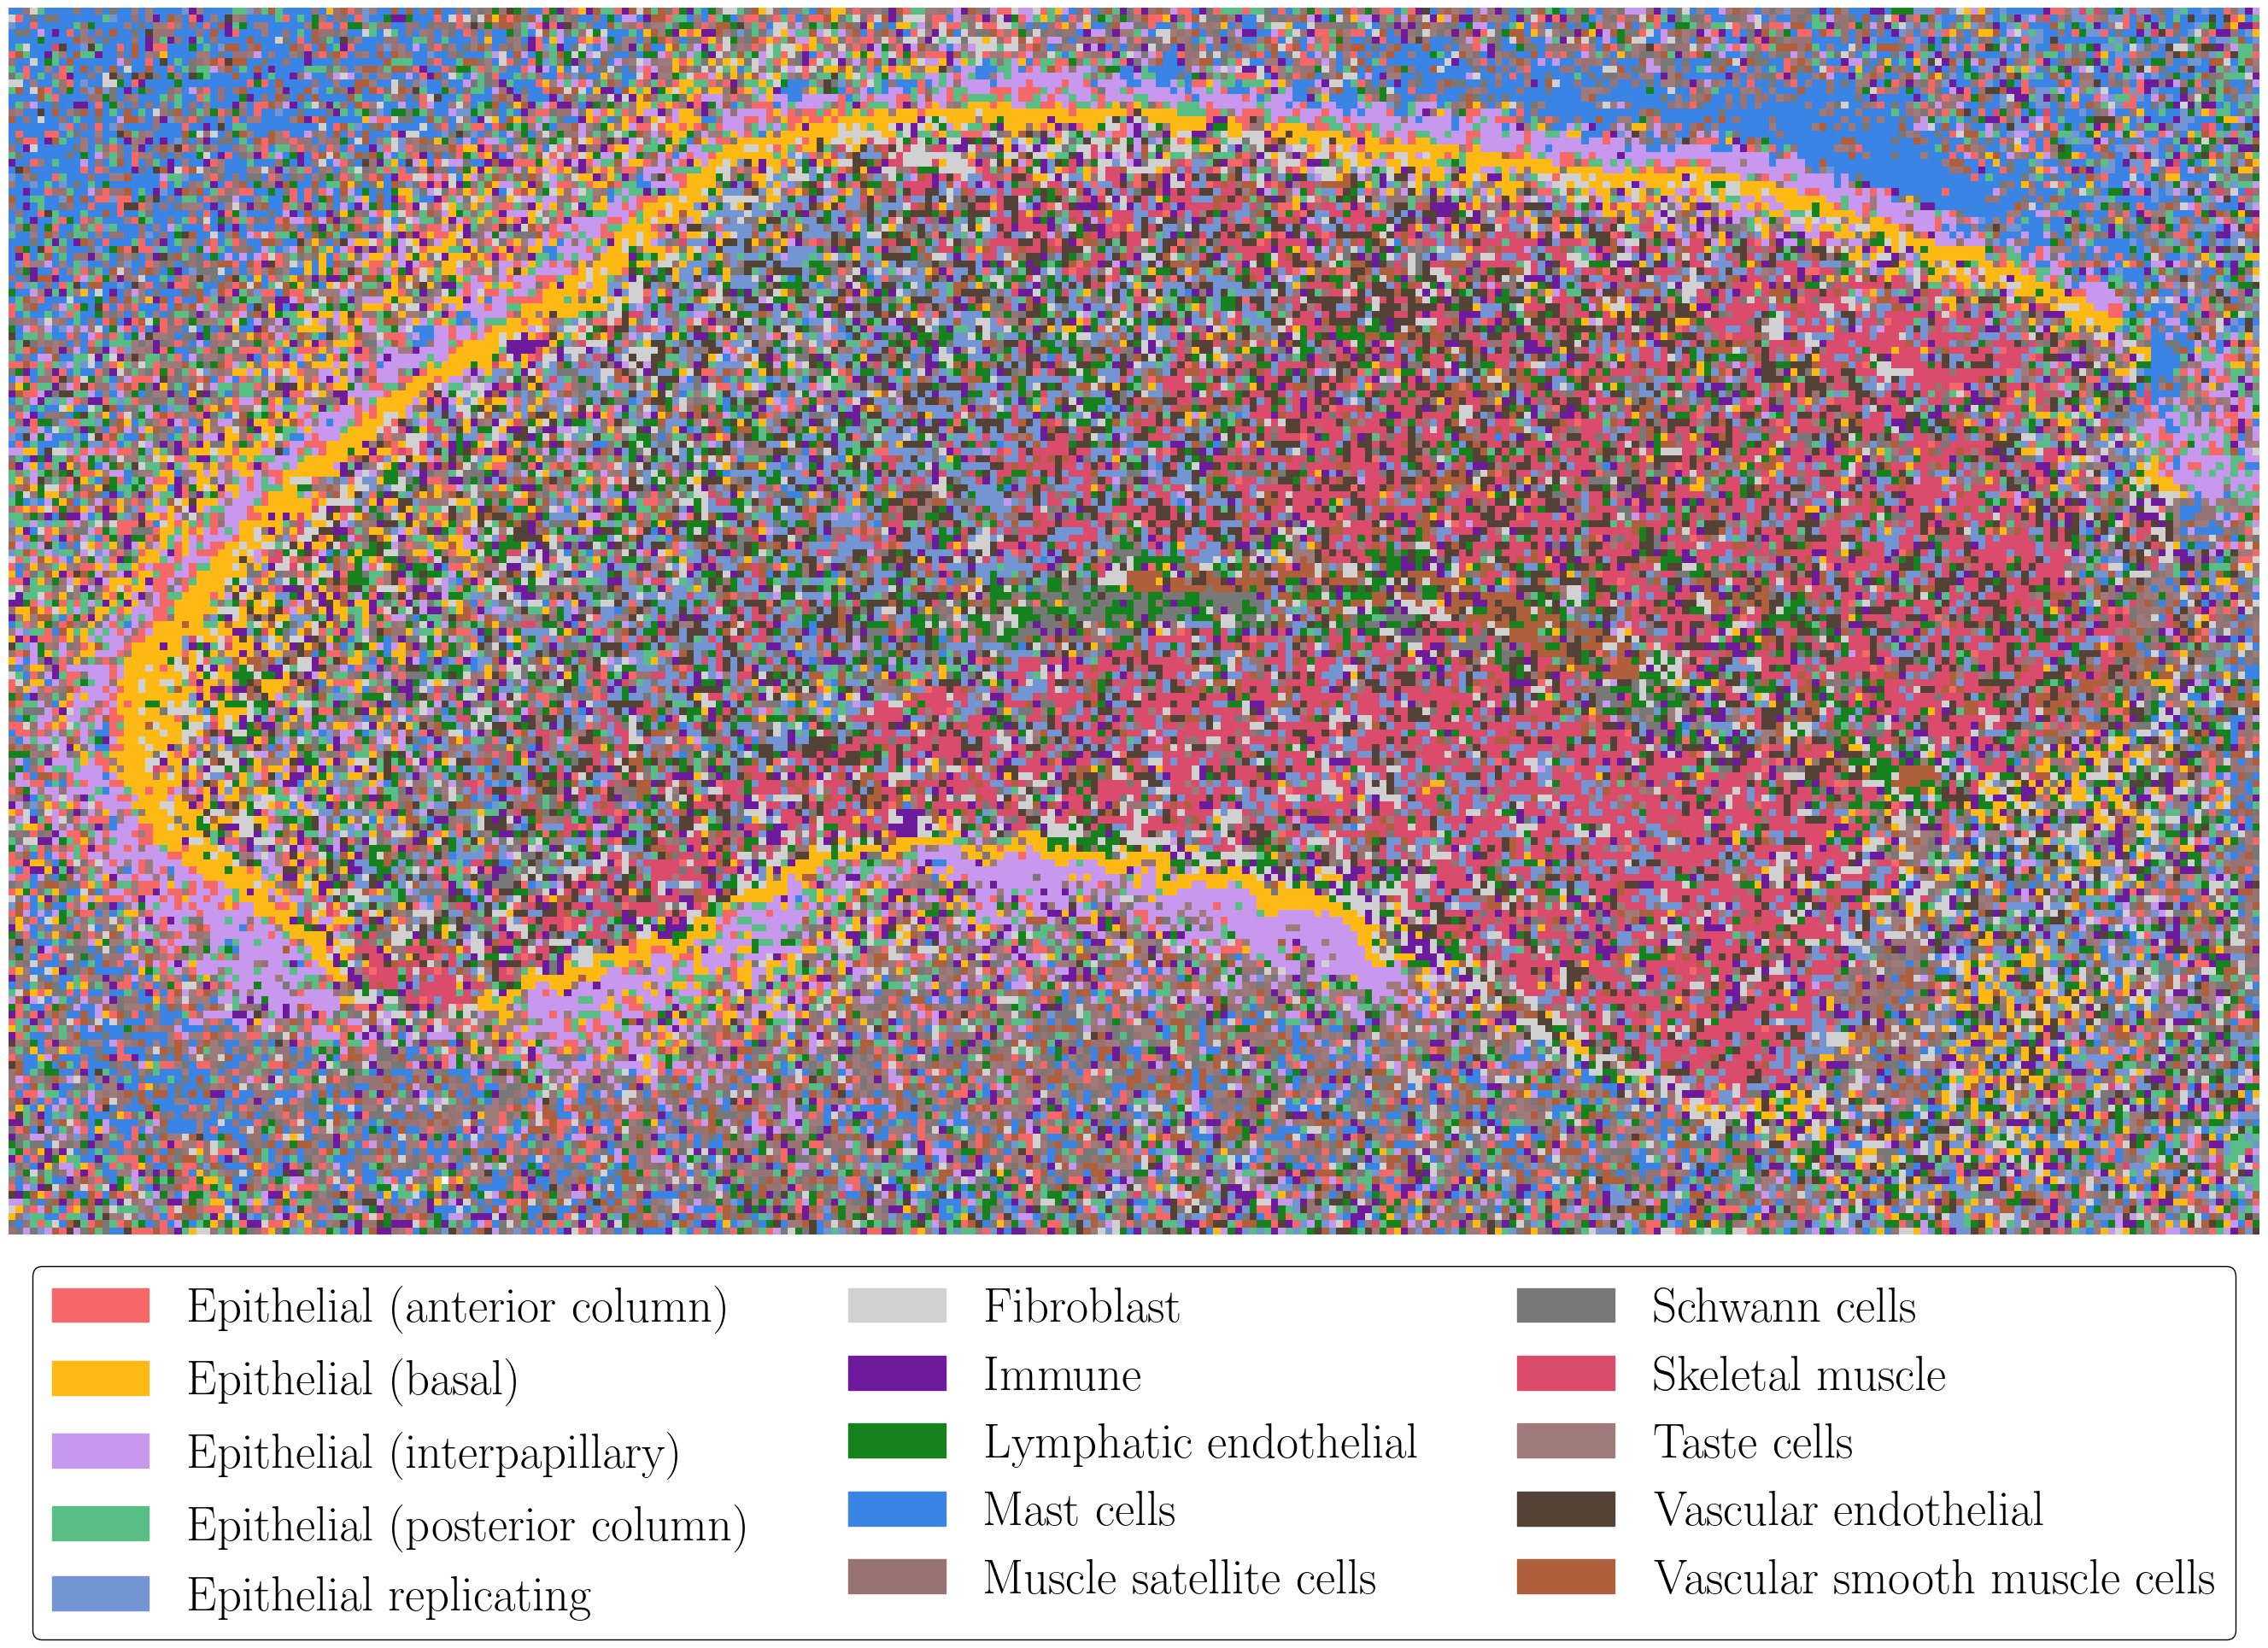

In [118]:
name = "ranks"
n = 10

cts_used, cts_num = np.unique(page[name], return_inverse=True)
cts_num = cts_num +1
# check mapping in correct order
assert (cts_used == cts).all()

new_dimy = page["sdimx"]


size = (n*(np.max(new_dimy)+1), n*(np.max(page["sdimy"])+1))



#page["new_sdimy"] = size[0] - 1 - page["sdimy"]*n
arr = np.zeros(size) 
for i in range(n):
    for j in range(n):
        arr[new_dimy*n+i, page["sdimy"]*n+j] = cts_num

cm = matplotlib.colors.ListedColormap(["#FFFFFF"] + COLOURS[:len(cts_used)])

fig, ax = plt.subplots()
im = ax.imshow(arr, cmap = cm, interpolation="none")
# set im size
fig.set_size_inches(np.array(arr.shape)/50)
fig.set_dpi(100)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_cmap(cm)

values = np.unique(cts_num)
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ matplotlib.patches.Patch(color=colors[i], label=cts[i] ) for i in range(len(values)) ]
#ax.colorbar()
ax.legend(handles=patches,fancybox=True, framealpha=1, edgecolor = "black",
          prop={'size': 41},loc='lower center', ncol = 3, bbox_to_anchor=(0.5,-0.35))  
ax.axis('off')
plt.savefig(os.path.join(PLOTS, "side_1_" + name + ".pdf"), dpi = 100, format = "pdf", pad_inches = 0, bbox_inches = "tight")
plt.show()

# Creating cartoons for seminar

In [12]:
def get_rand_hex(im, colour_frac, bTop):
    rgb = (1 - np.random.random())*colour_frac + (1-colour_frac) if bTop else (1 - np.random.random())*colour_frac
    return rgb_to_hex(im.cmap(rgb))

#https://www.codespeedy.com/convert-rgb-to-hex-color-code-in-python/
def rgb_to_hex(rgb): 
    return '#%02x%02x%02x' % tuple([round(rgb[i]*255) for i in range(3)])

In [10]:
def circles(init_size, diam, space, border_width, cm, colour_frac, filename, notGreyed = True):
    # creates colour gradient
    im = plt.imshow(np.arange(0,100).reshape(100,1), cmap = cm)

    def round_size(x): return(x//(diam+space)+1)*(diam+space)+space+border_width*2+1
    size = [round_size(x) for x in init_size]

    image = Image.new('RGBA', size)
    draw = ImageDraw.Draw(image)

    for i in range(border_width):
        draw.rectangle((i,i,size[0]-1-i,size[1]-1-i), fill = None, outline = "#000000")# if notGreyed else "#202020")
    draw.rectangle((i+1,i+1,size[0]-2-i,size[1]-2-i), fill = "#FFFFFF" if notGreyed else "#EEEEEE")
    for i in range(space+border_width, size[0]-border_width-space, diam+space):
        for j in range(space+border_width, size[1]-border_width-space, diam+space):
            rhex = get_rand_hex(im, colour_frac, notGreyed)
            draw.ellipse((i,j,i+diam,j+diam), fill = rhex, outline = rhex)

    if filename is not None:
        image.save(os.path.join(output_dir, filename))
    plt.close()
    return image

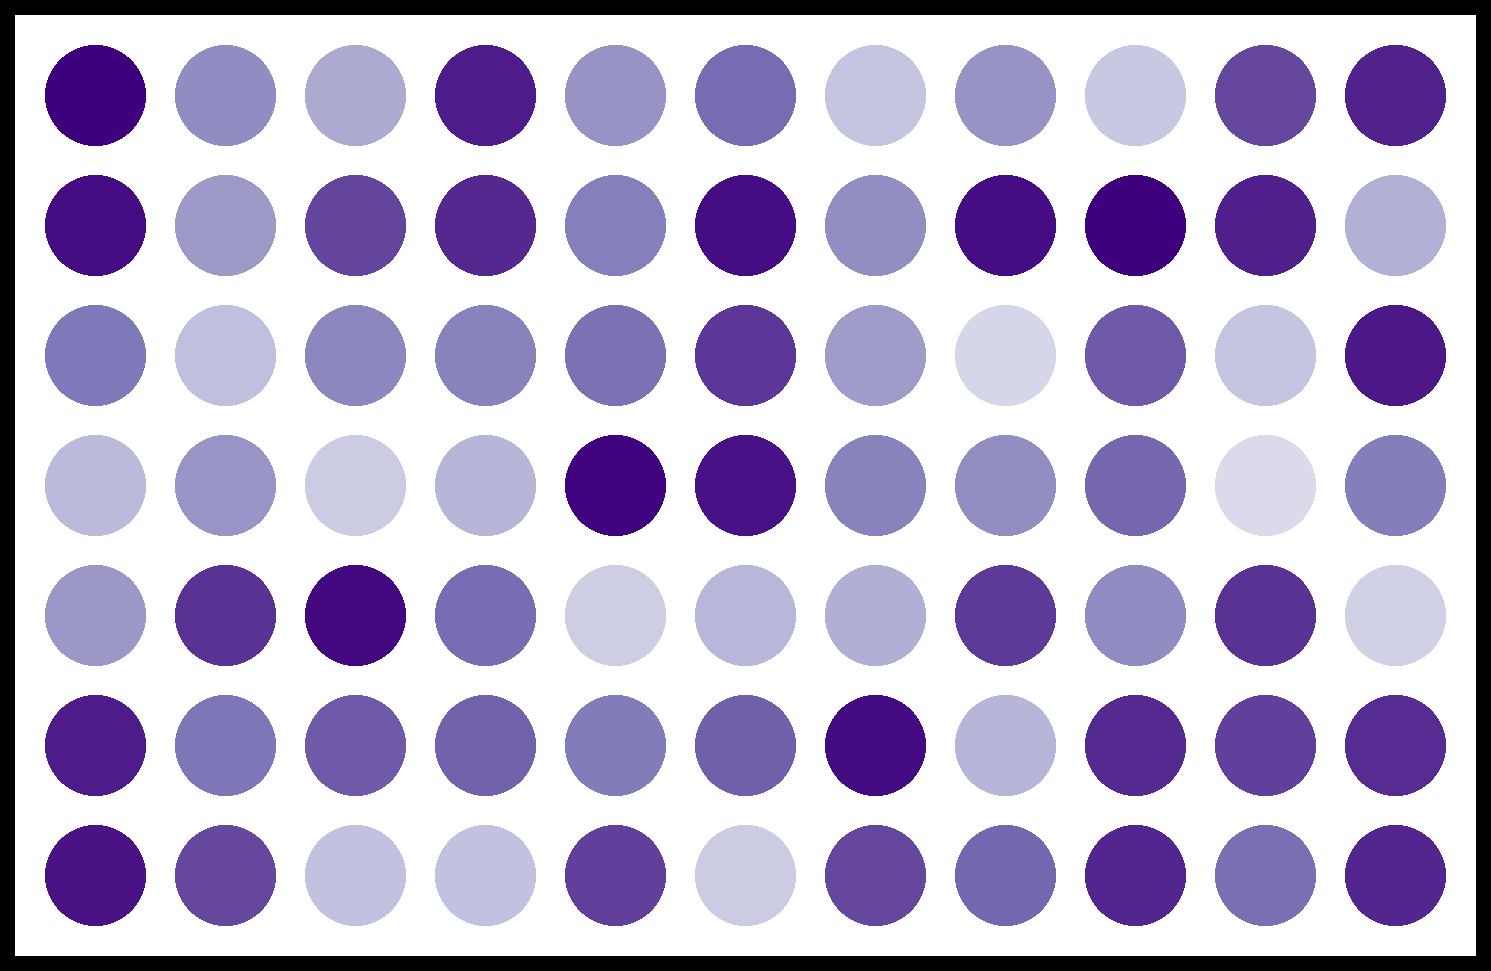

In [13]:
diam = 100
space = 30
border_width = 15

output_dir = "/data/gdrive/Education/Uni/YR4 - Sem1/CITS4001/Seminar/images/diagrams"

cm = matplotlib.colormaps["Purples"]
top_colour_frac = 0.75

np.random.seed(1234867)
_ = circles((1,1200), diam, space, border_width, cm, top_colour_frac, "1d_2.png")
np.random.seed(1234867)
_ = circles((1400,900), diam, space, border_width, cm, top_colour_frac, "2d.png")
_

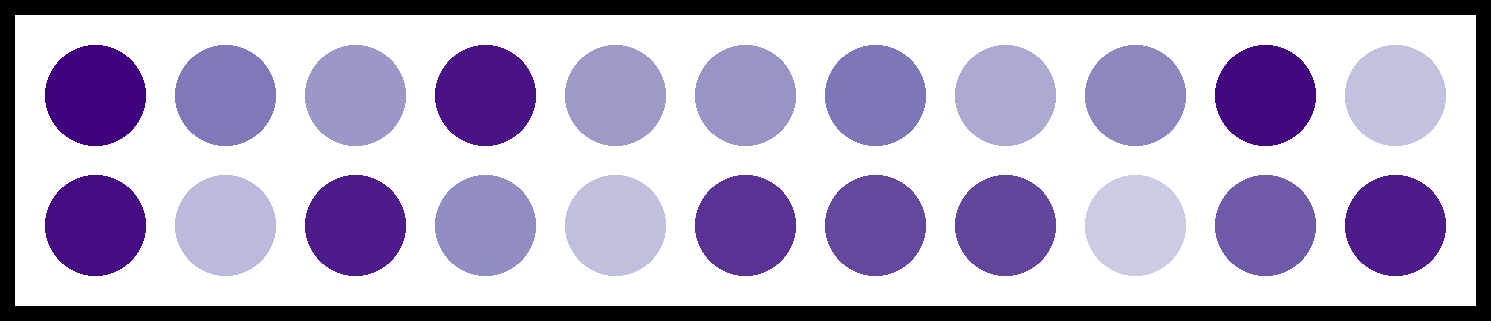

In [20]:
np.random.seed(1234867)
_ = circles((1300,150), diam, space, border_width, cm, top_colour_frac, "xy.png")
_

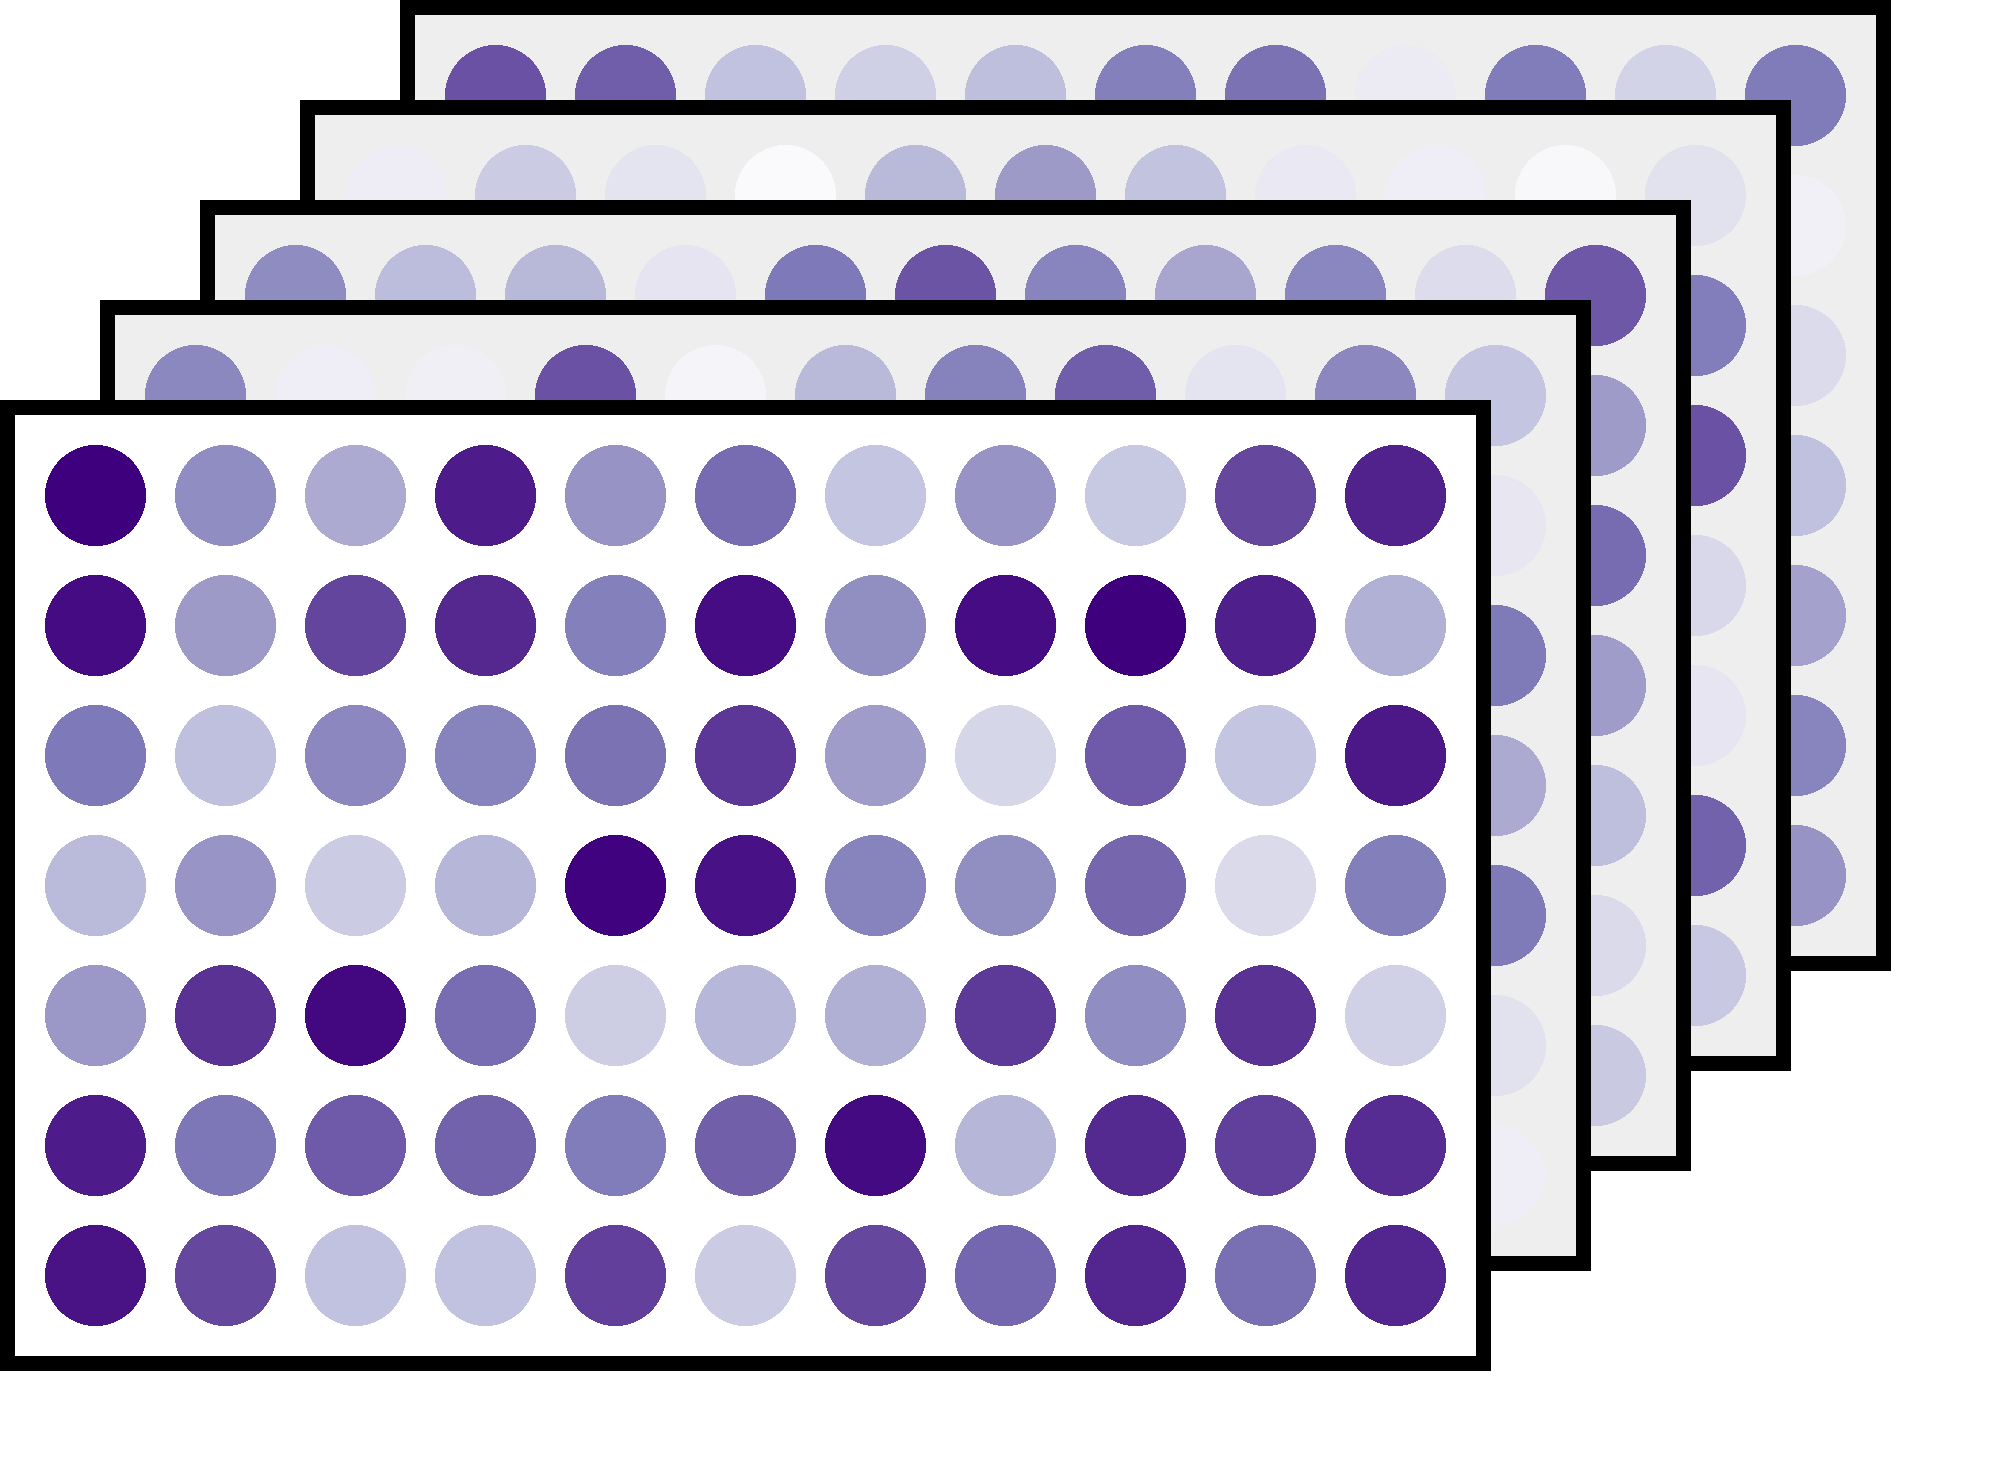

In [420]:
def cirlces_mulitple(init_size, n, gap, filename = None, seeds = None):
    size = [round_size(x) for x in init_size]
    new_shape = (size[1]+gap*n, size[0]+gap*n, 4)
    new_arr = np.zeros(new_shape, dtype = np.uint8)

    for i in range(n):#range(n-1,-1,-1):
        x = i*gap
        y = (n-i-1)*gap

        np.random.seed(seeds[i])
        arr = np.array(circles(init_size, diam, space, border_width, cm, top_colour_frac, None, i==n-1))
        new_arr[x:size[1]+x, y:size[0]+y] = arr

    image = Image.fromarray(new_arr)
    if filename is not None:
        image.save(os.path.join(output_dir, filename))
    return image

init_size = (1400,900)
n = 5
gap = 100
cirlces_mulitple(init_size, n, gap, filename = "3d.png", seeds = [None]*(n-1) + [1234867])

## Creating Cartoons for Lightning Talk

In [53]:
def dist(pos1, pos2):
    return np.sqrt((pos2[0] - pos1[0])**2 + (pos2[1] - pos1[1])**2)

In [50]:
NUM_SPHERES = 30
SIZE_VAR = 40
SIZE = (1000, 1000)
MEAN_SPHERE_SIZE = 120
SEED = 314

In [49]:
def get_pos_size(num_spheres, size_var, size, mean_sphere_size, seed, nuclei_size_mean, nuclei_size_var):
    if seed is None:
        seed = np.random.randint(0, 2**16-1)
        print(seed)
    np.random.seed(seed)
    pos = []
    i = 0
    while len(pos) < num_spheres and i < num_spheres*5:
        new = np.random.rand(2)*(size[0] - mean_sphere_size - size_var/2)
        new = new.astype(int)
        if len(pos) > 0:
            dists = [dist(a, new) for a in pos]
            if np.min(dists) > mean_sphere_size + size_var/2:
                pos.append(new)
            else: i += 1
        else: pos.append(new)
    if i == num_spheres*5: 
        print("failed")
        return (None,None,None)
    sizes = (np.random.rand(num_spheres, 2)*size_var).astype(int) + mean_sphere_size - size_var / 2
    nuclei_sizes = (np.random.rand(num_spheres, 1)*nuclei_size_var).astype(int)+nuclei_size_mean-nuclei_size_var/2
    return (pos, sizes, nuclei_sizes)

In [48]:
def draw_im(pos, sizes, size, nuclei_sizes, black_outlines = False):
    inside = "#6FB4FF"
    membrane = "#2374CC"
    nuclei = "#985AC4"
    outline = "#0E427B"
    
    outline_width = 7
    
    image = Image.new('RGBA', size)
    draw = ImageDraw.Draw(image)
    
    draw.rectangle((0,0,*size), fill = "white", outline = "white")
    
    for (i, (x,y)) in enumerate(pos):
        if black_outlines: #0AFF08
            draw.ellipse((x-black_outlines, y-black_outlines, 
                          x+sizes[i, 0]+black_outlines, y+sizes[i, 1]+black_outlines), 
                          fill = outline, outline = outline)
            draw.ellipse((x, y, x+sizes[i, 0], y+sizes[i, 1]), fill = inside, outline = membrane)
        else:
            draw.ellipse((x, y, x+sizes[i, 0], y+sizes[i, 1]), fill = membrane, outline = membrane)
            draw.ellipse((x+outline_width, y+outline_width, 
                          x+sizes[i, 0]-outline_width, y+sizes[i, 1]-outline_width), 
                         fill = inside, outline = inside)
        
        draw.ellipse((x+sizes[i, 0]/2-nuclei_sizes[i], y+sizes[i, 1]/2-nuclei_sizes[i], 
                      x+sizes[i, 0]/2+nuclei_sizes[i], y+sizes[i, 1]/2+nuclei_sizes[i]), 
                    fill = nuclei, outline = nuclei)
        
    return image, draw

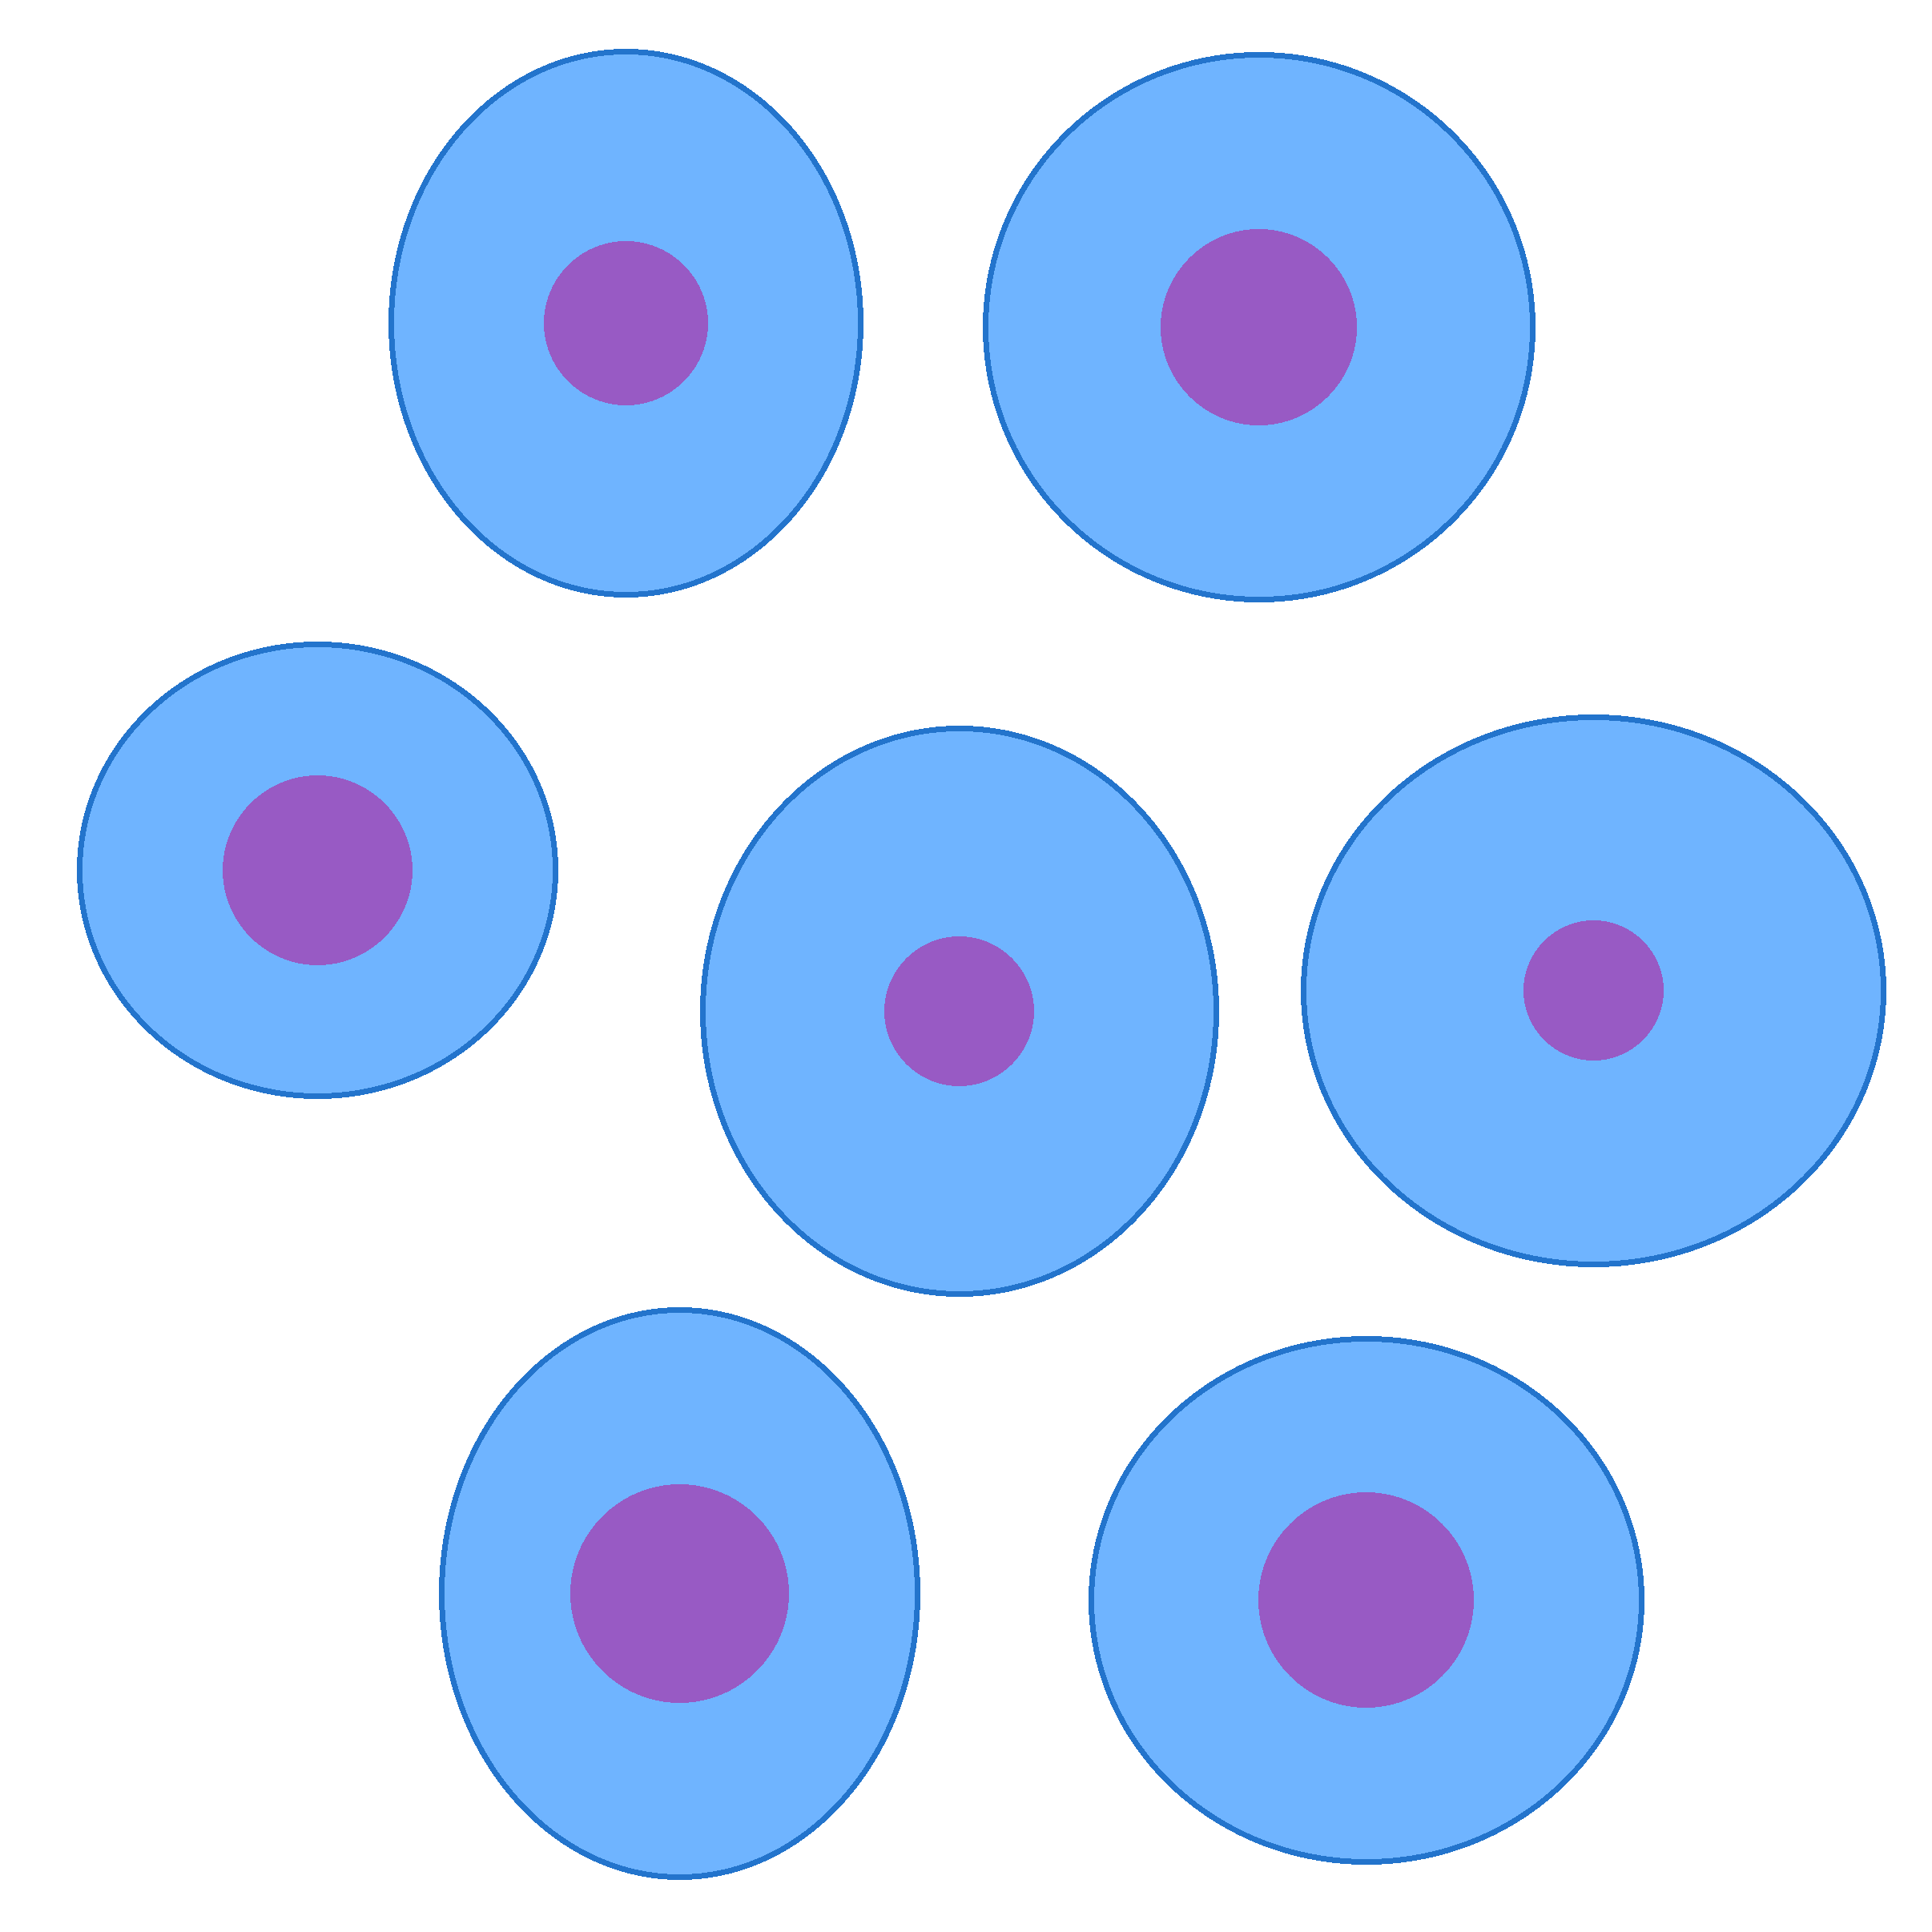

In [161]:
NUM_SPHERES = 7
SIZE_VAR = 100*2
SIZE = (1206*2, 1206*2)
MEAN_SPHERE_SIZE = 320*2
SEED = 23333 #16779 # 65381 # 23333
MEAN_NUCLEI_SIZE = 55*2
NUCLEI_SIZE_VAR = 30*2

pos, sizes, nuclei_sizes = get_pos_size(NUM_SPHERES, SIZE_VAR, SIZE, MEAN_SPHERE_SIZE, SEED, MEAN_NUCLEI_SIZE, NUCLEI_SIZE_VAR)
pos = np.array(pos)
pos[:,1] = pos[:,1]+20*2
#pos = np.array([[150,150], [100,800], [350,500], [500,100], [800,400], [700,800]])
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes)
#im, draw = draw_spots(im, draw, 10)
im.save("00_tissue.png")
im

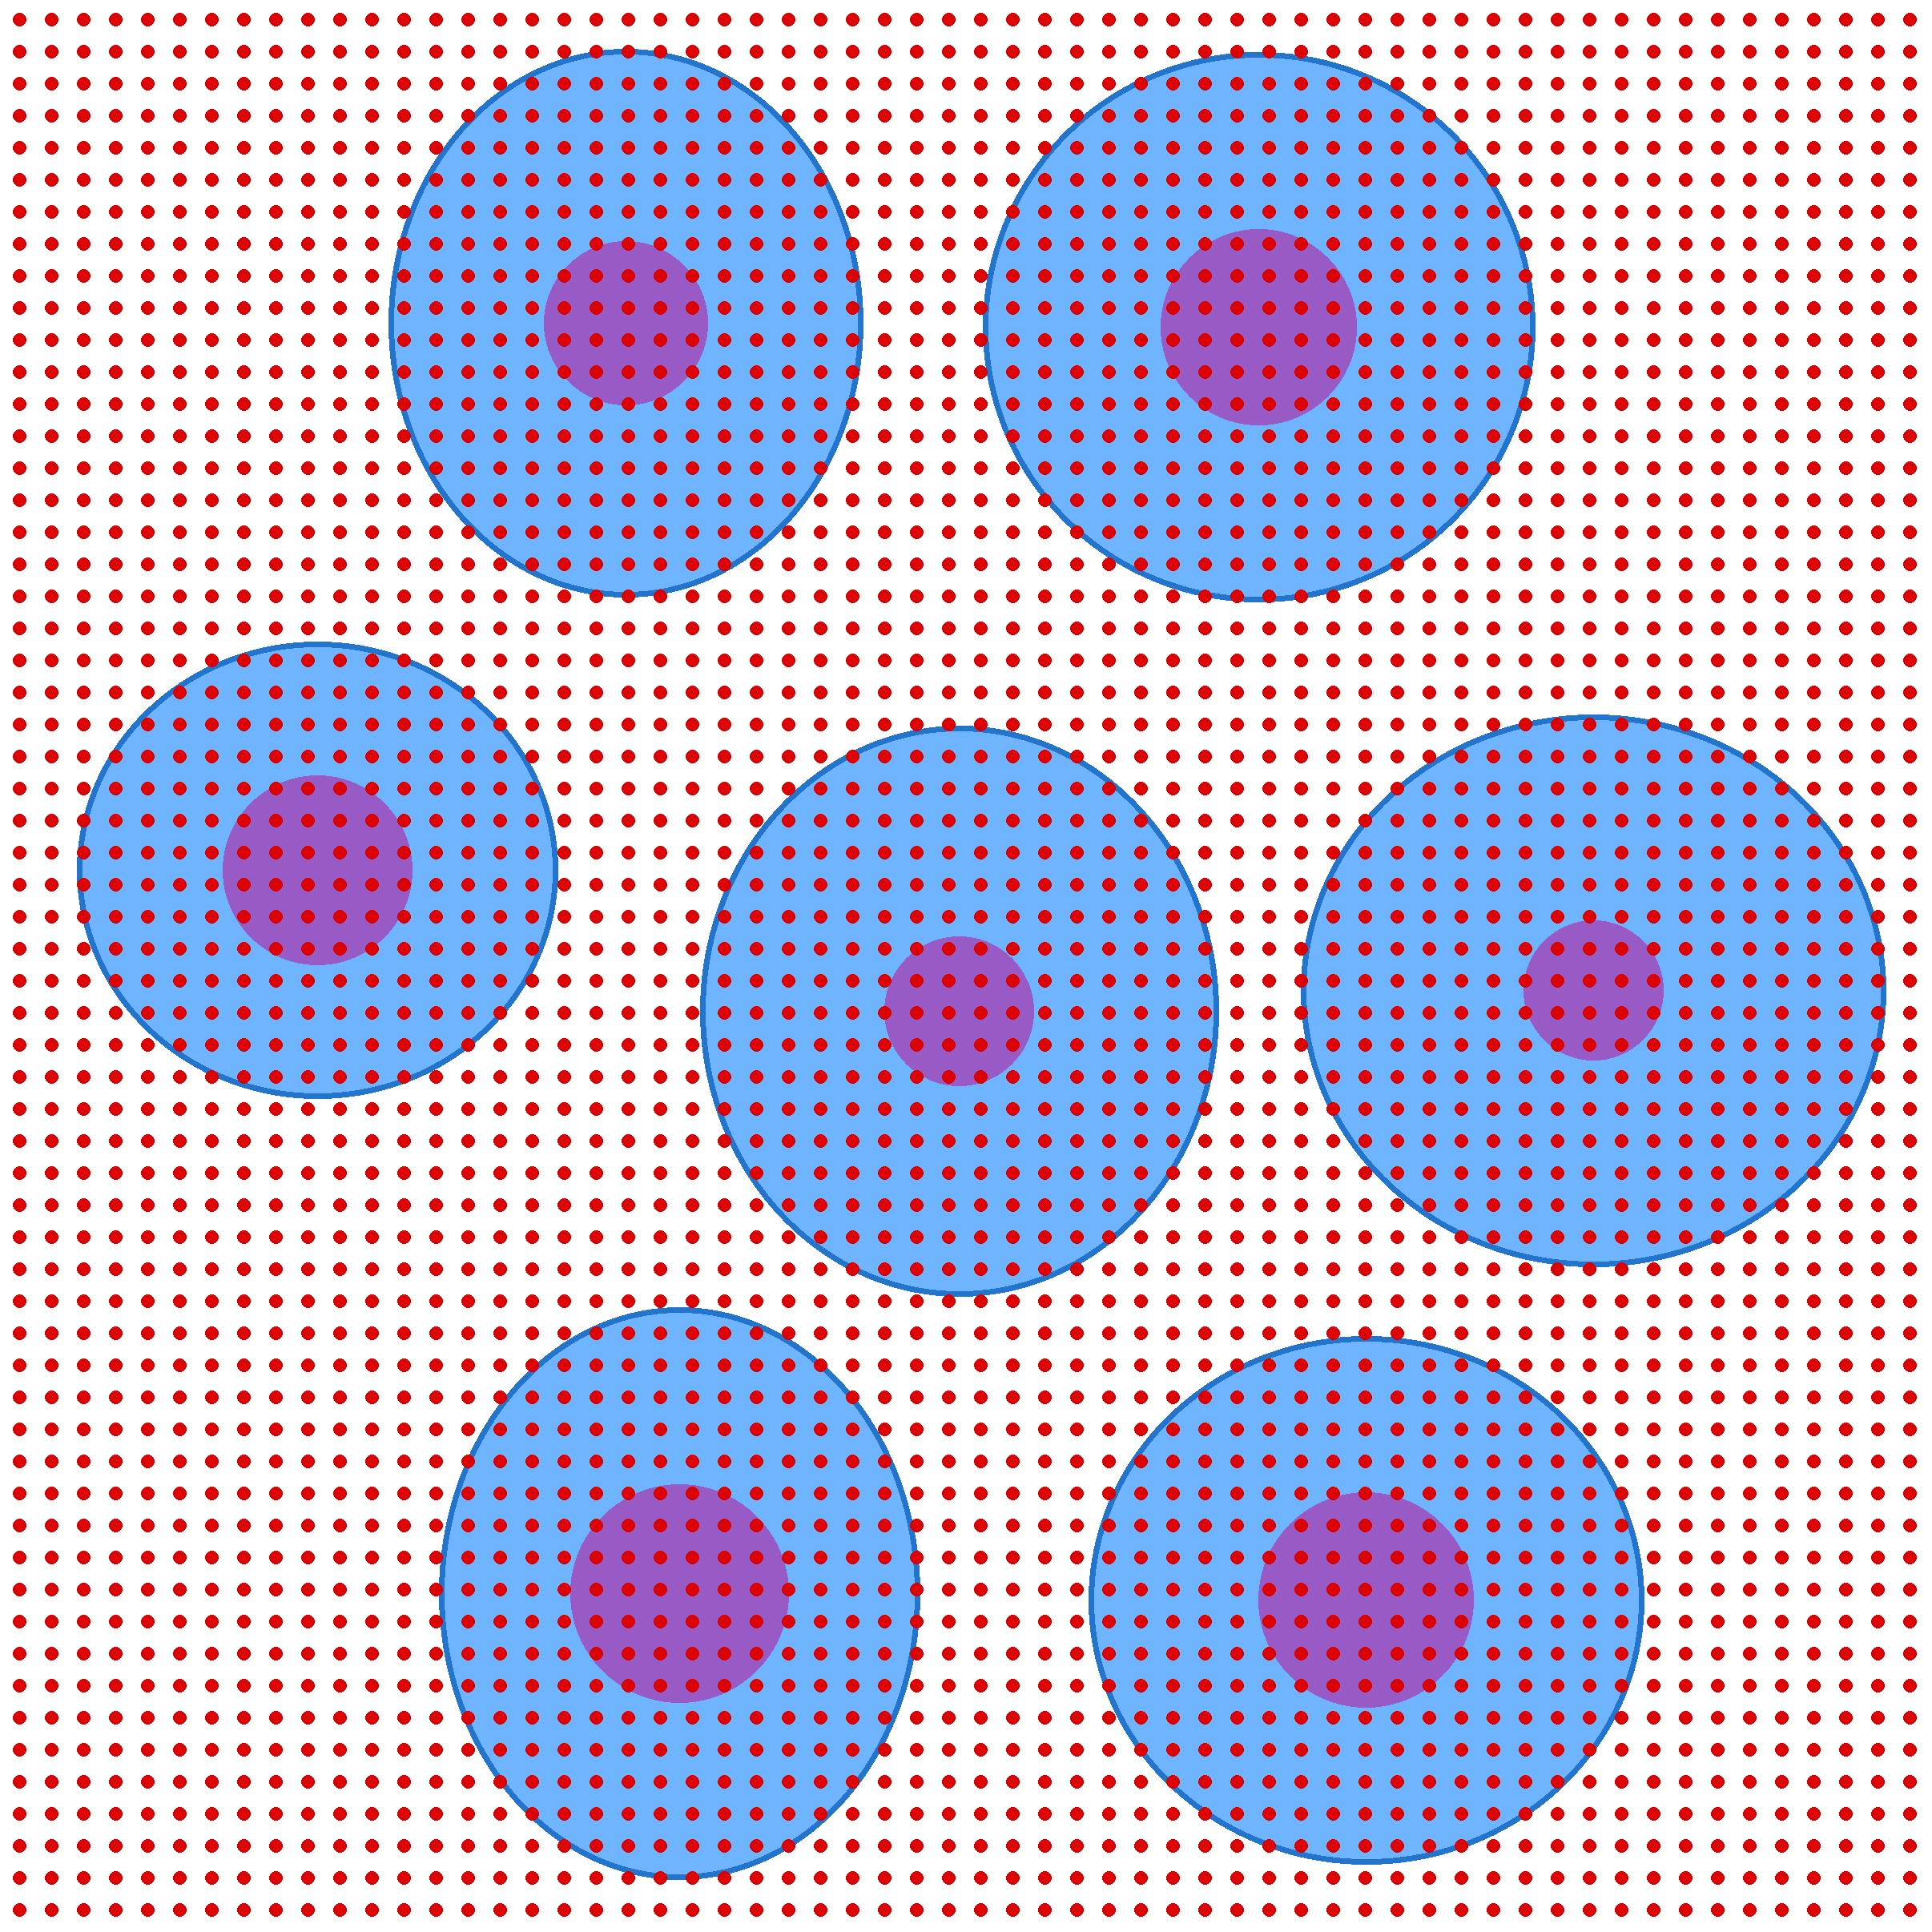

In [162]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes)
im, draw = draw_spots(im, draw, 20*2, diam = 8*2)
im.save("01_on_slide.png")
im

In [46]:
def draw_spots(image, draw, dist: int, filter = False, diam = 1):
    for i in range(int(dist/2)+4, image.size[0], dist):
        for j in range(int(dist/2)+4, image.size[1], dist):
            color_b = image.getpixel((i,j))[:3] != (255,255,255) and image.getpixel((i,j))[:3] != (14,66,123)
            if not filter or color_b:
                draw.ellipse((i-diam//2, j-diam//2, i+math.ceil(diam/2), j+math.ceil(diam/2)), fill = '#DD0000', outline ='#D20000')     
        
    return image, draw

In [47]:
def draw_grids(im, draw, dist: int, width: int):
    for i in range(0, im.size[0], dist):
        for j in range(0, im.size[0], dist):
            for k in range(width):
                draw.rectangle((i+k, j+k, i+dist-1+k, j+dist-1+k), fill = None, outline ='#000000')     
        
    return im,draw

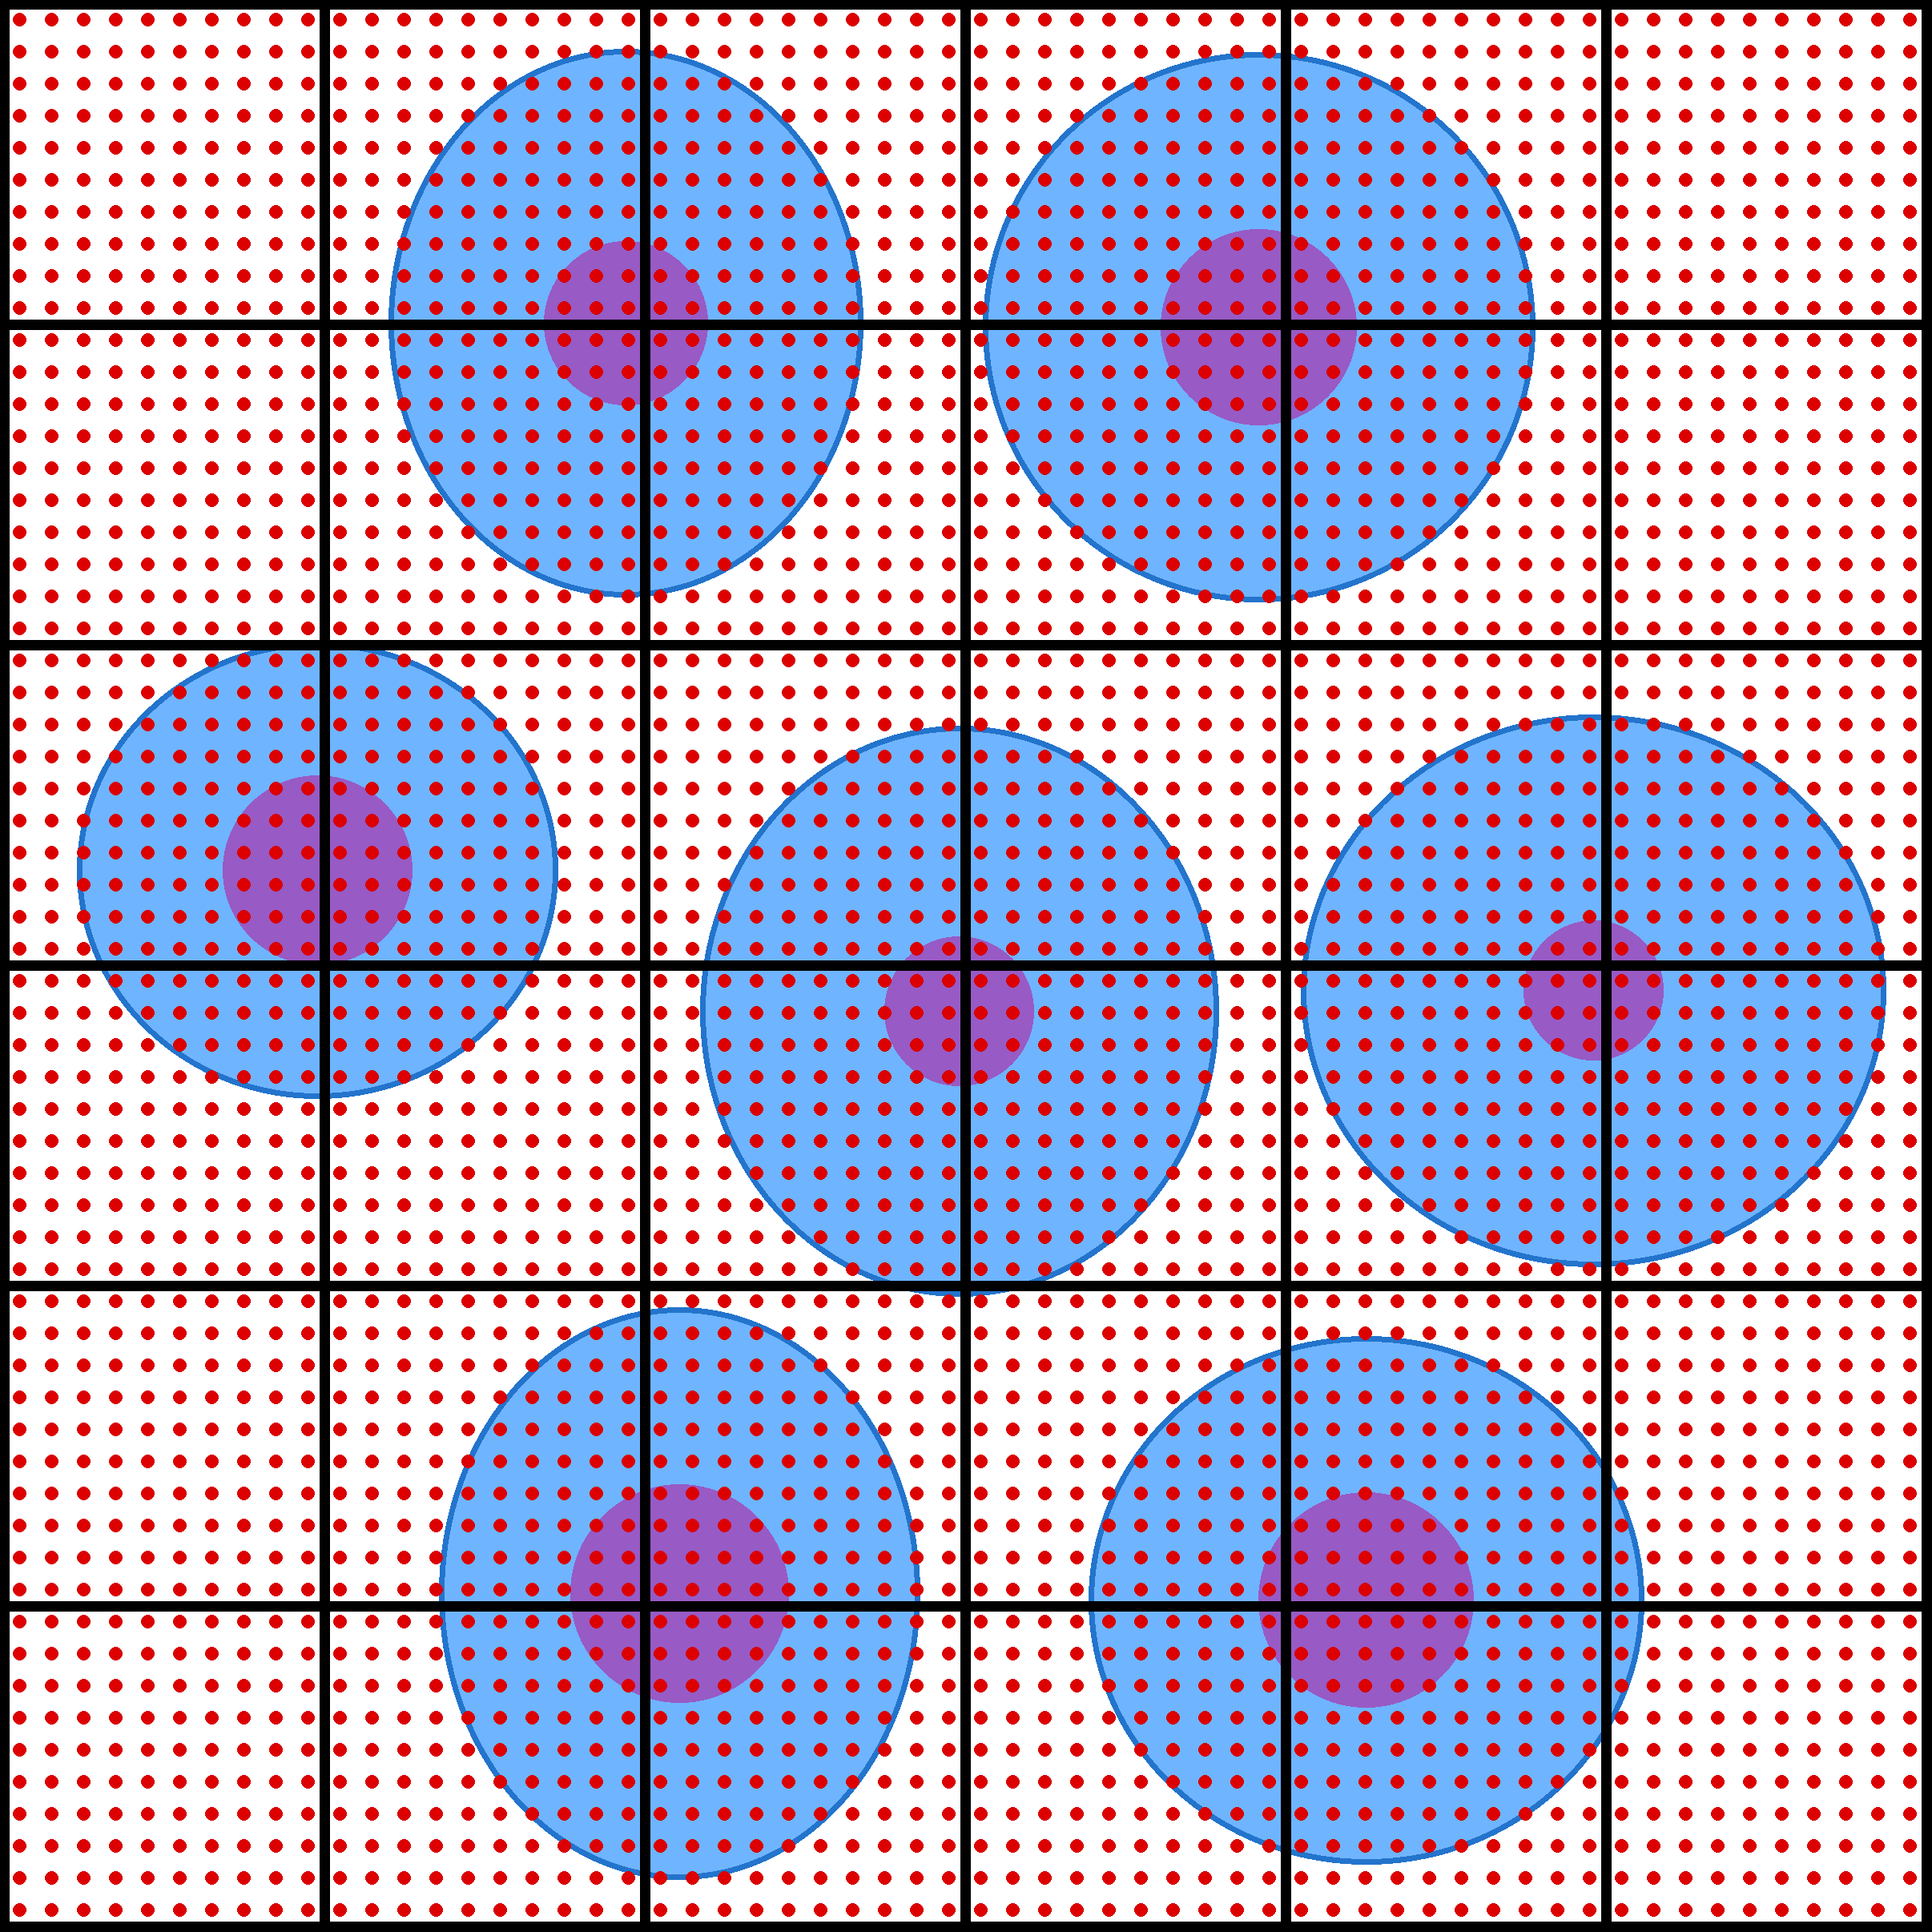

In [163]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes)
im, draw = draw_spots(im, draw, 20*2, diam = 8*2)
im, draw = draw_grids(im, draw, 200*2, 6*2)
im.save("02_binned.png")
im

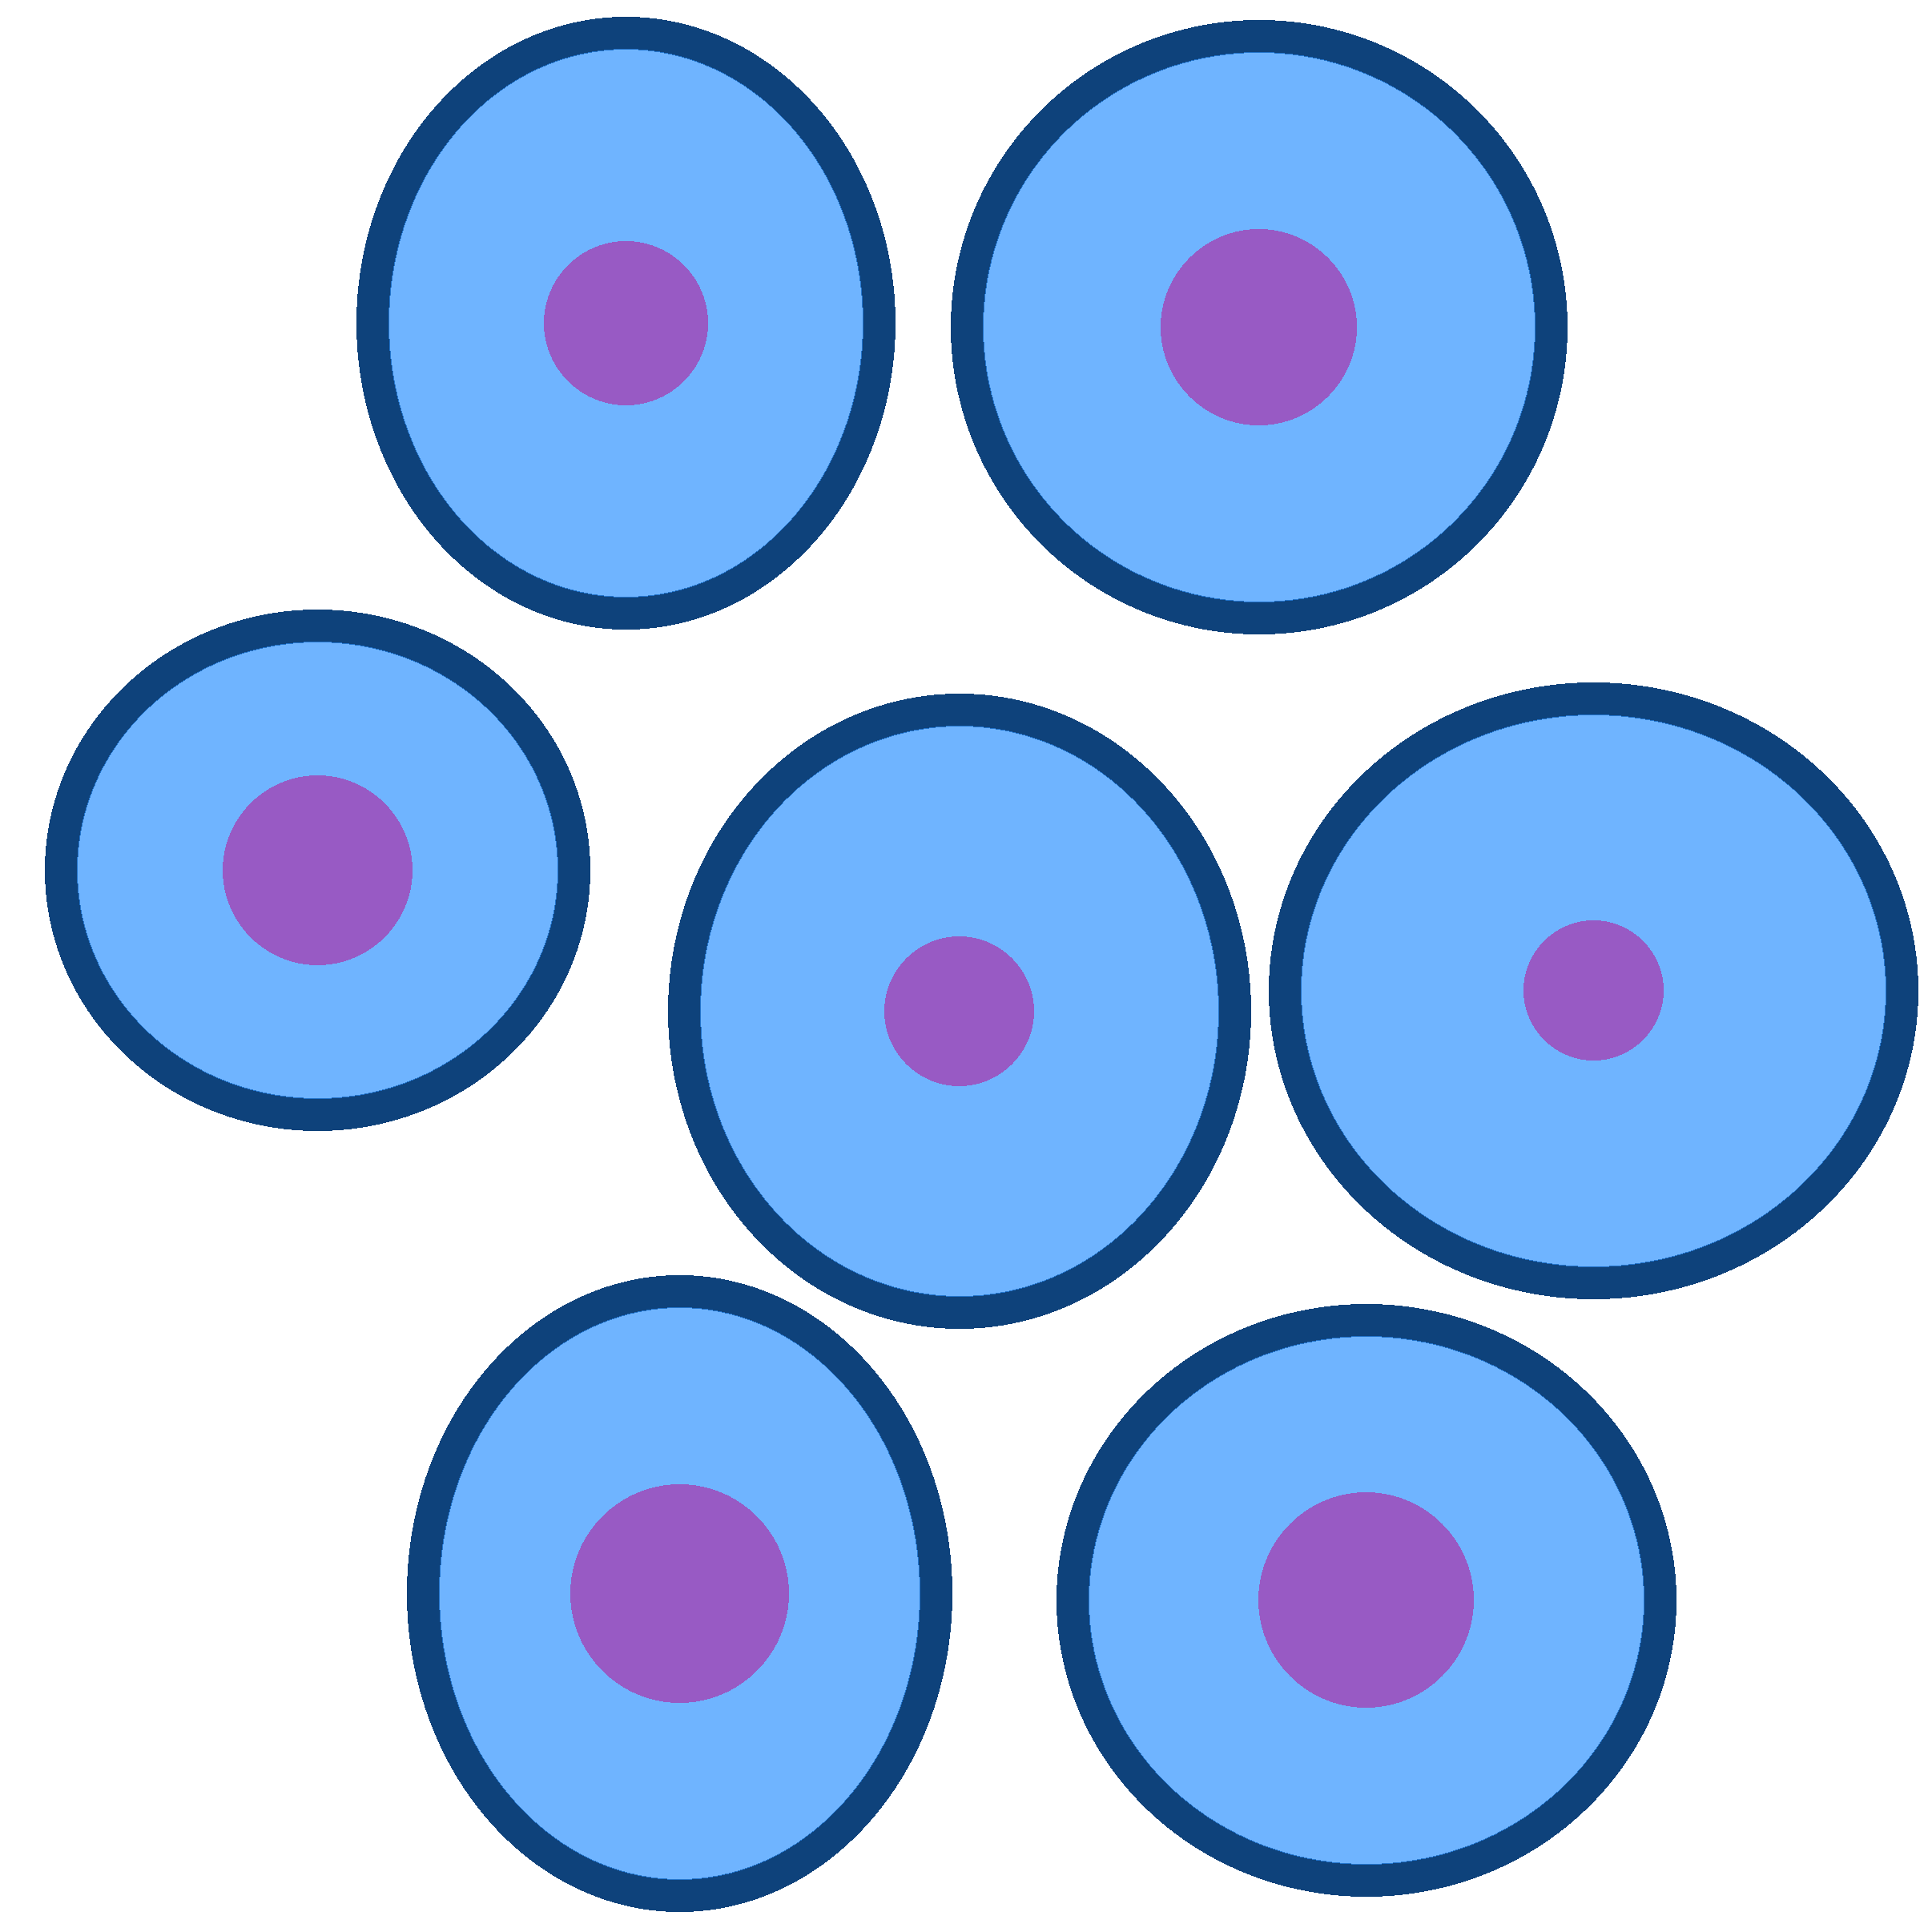

In [167]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes, 40)
#im, draw = draw_spots(im, draw, 20, diam = 6)
im.save("03_segmented.png")
im

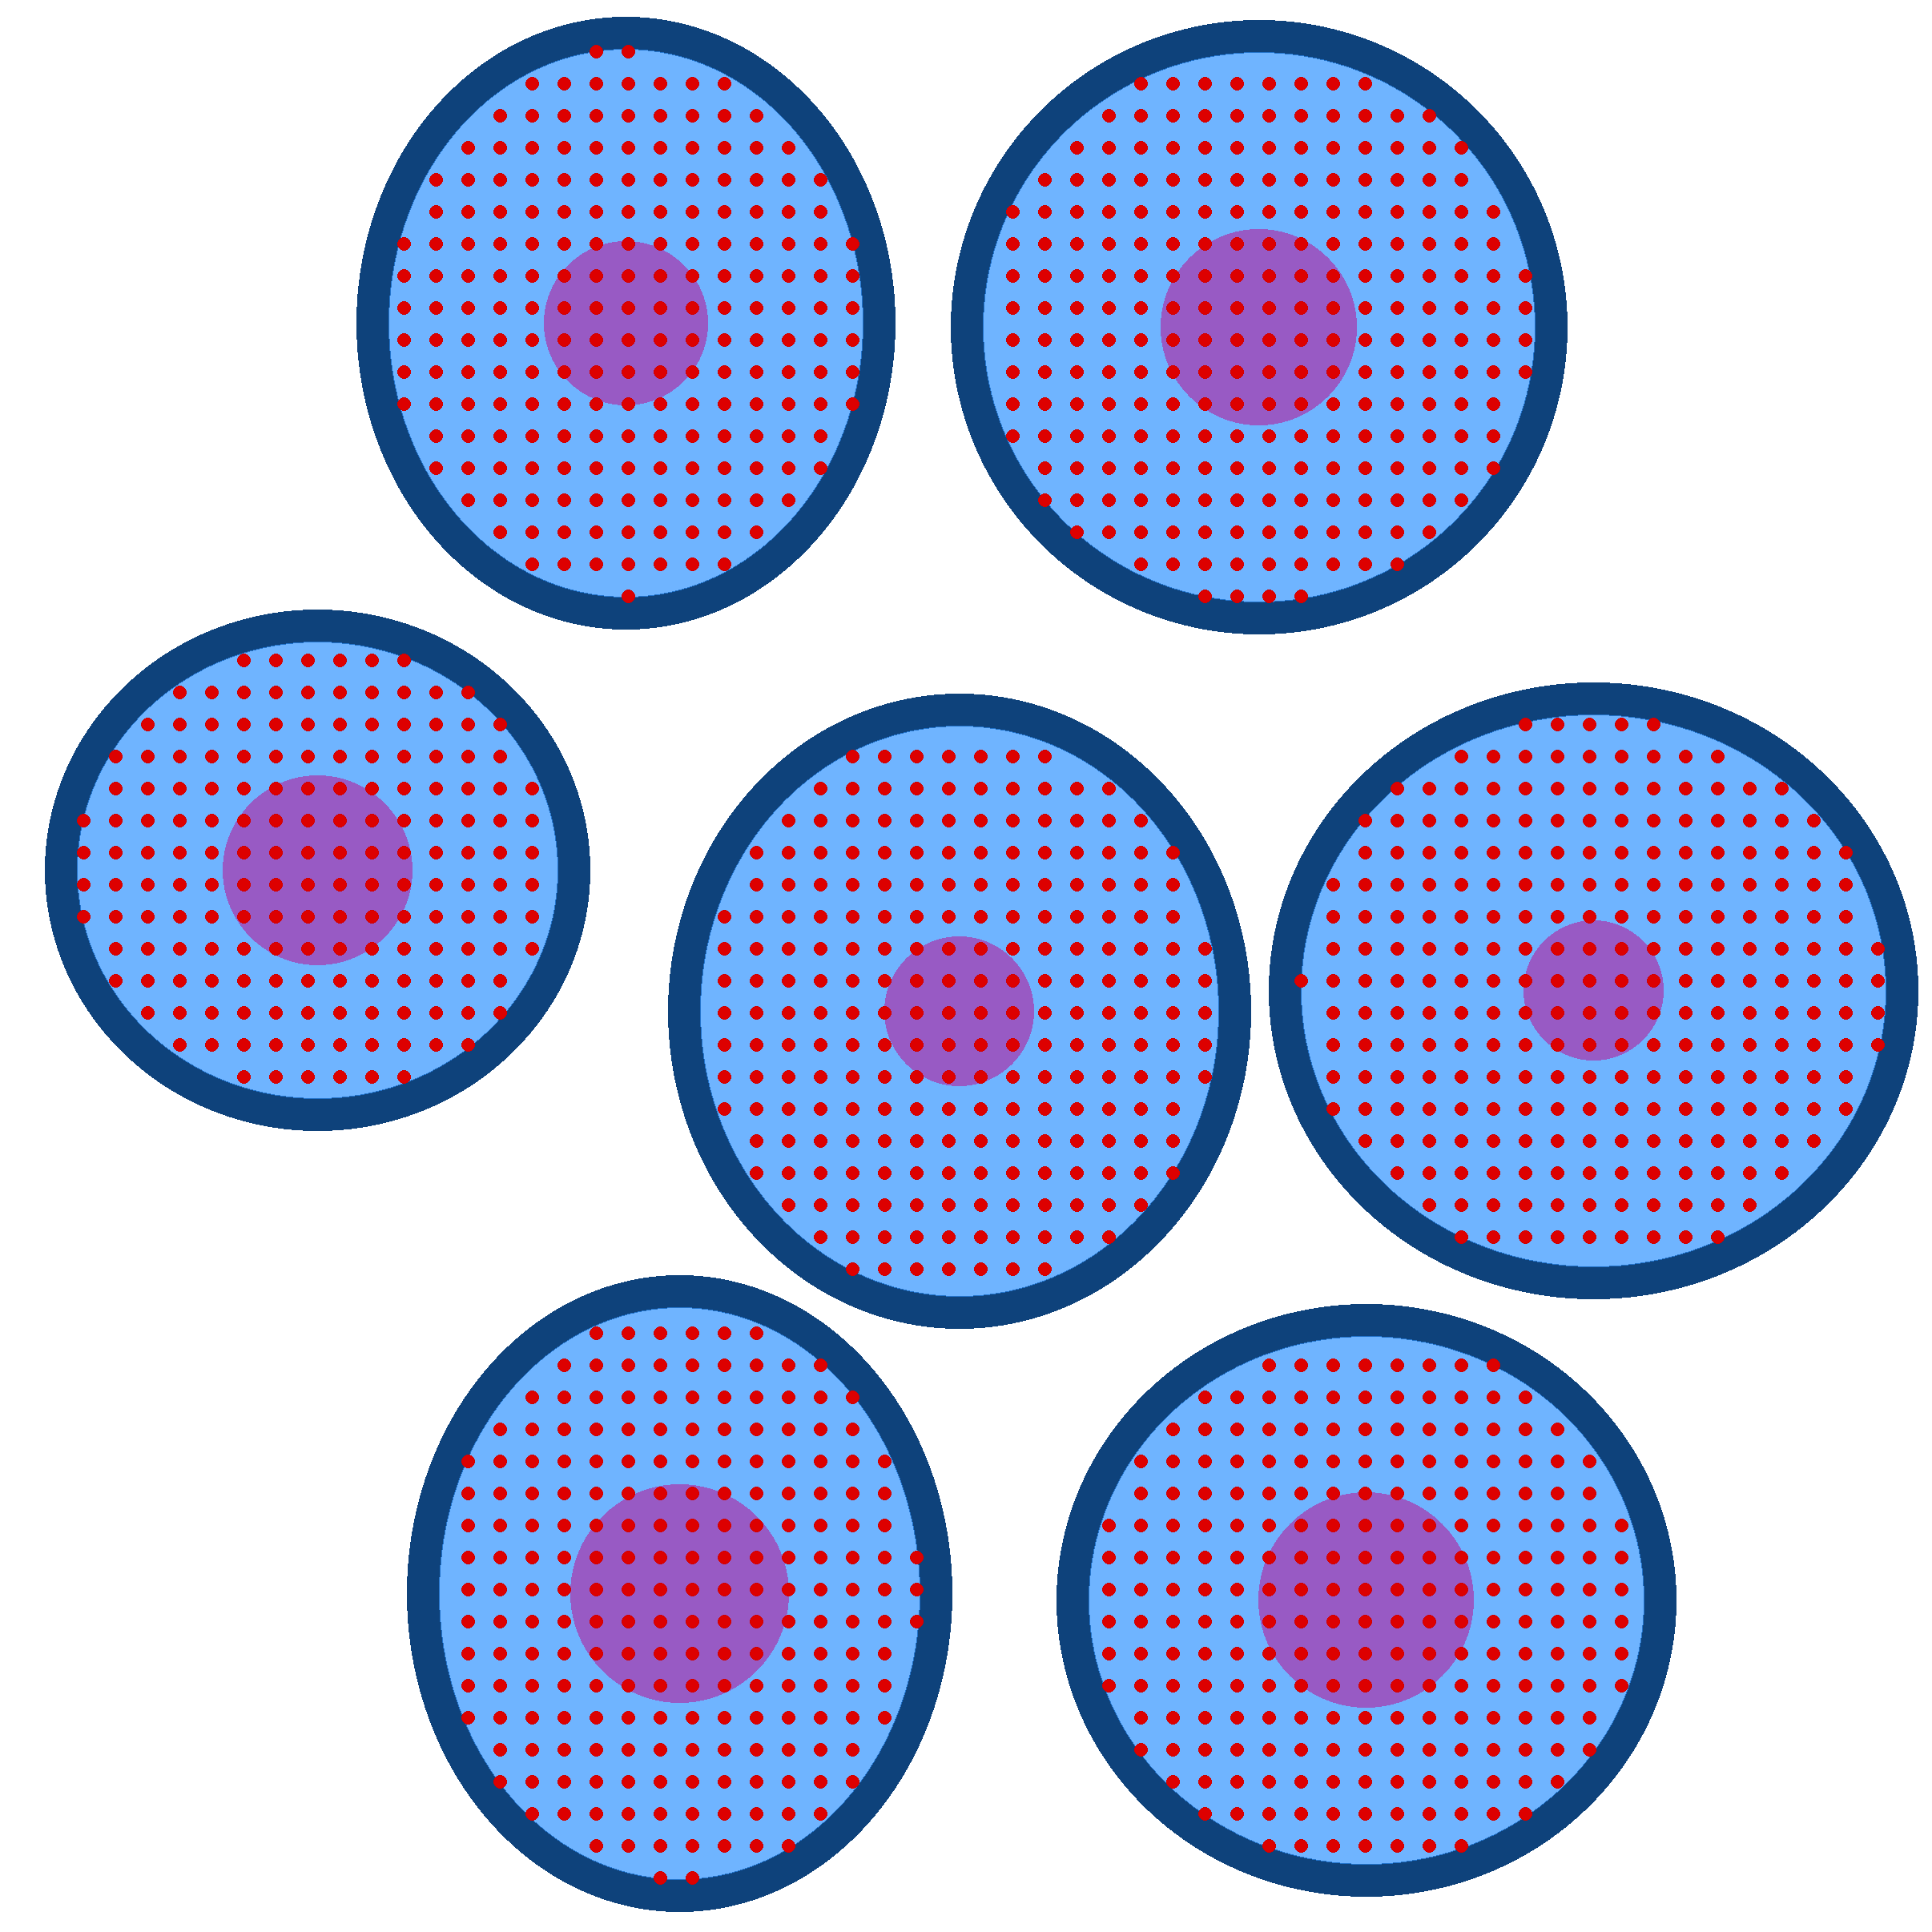

In [166]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes, 40)
im, draw = draw_spots(im, draw, 40, diam = 16, filter = True)
im.save("04_segment_applied.png")
im

In [316]:
im.getpixel((0,0))[:3] != (0,0,0)

False

## For seminar

In [54]:
NUM_SPHERES = 7
SIZE_VAR = 100*2
SIZE = (1206*2, 1206*2)
MEAN_SPHERE_SIZE = 320*2
SEED = 23333 #16779 # 65381 # 23333
MEAN_NUCLEI_SIZE = 55*2
NUCLEI_SIZE_VAR = 30*2

pos, sizes, nuclei_sizes = get_pos_size(NUM_SPHERES, SIZE_VAR, SIZE, MEAN_SPHERE_SIZE, SEED, MEAN_NUCLEI_SIZE, NUCLEI_SIZE_VAR)
pos = np.array(pos)
pos[:,1] = pos[:,1]+20*2
#pos = np.array([[150,150], [100,800], [350,500], [500,100], [800,400], [700,800]])
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes)
#im, draw = draw_spots(im, draw, 10)
im.save(os.path.join(output_dir, "spots_cells", "im1.png"))
#im

In [447]:
im = Image.new('RGBA', SIZE)
draw = ImageDraw.Draw(im)
draw.rectangle((0,0,*SIZE), fill = "white", outline = "white")
im, draw = draw_spots(im, draw, 20*2, diam = 8*2)
im.save(os.path.join(output_dir, "spots_cells", "im0.png"))

In [448]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes)
im, draw = draw_spots(im, draw, 20*2, diam = 8*2)
im.save(os.path.join(output_dir, "spots_cells", "im2.png"))
#im

In [432]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes)
im, draw = draw_spots(im, draw, 20*2, diam = 8*2, filter= True)
im.save(os.path.join(output_dir, "spots_cells", "im3.png"))

In [434]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes, 40)
im, draw = draw_spots(im, draw, 40, diam = 16, filter = True)
im.save(os.path.join(output_dir, "spots_cells", "im4.png"))

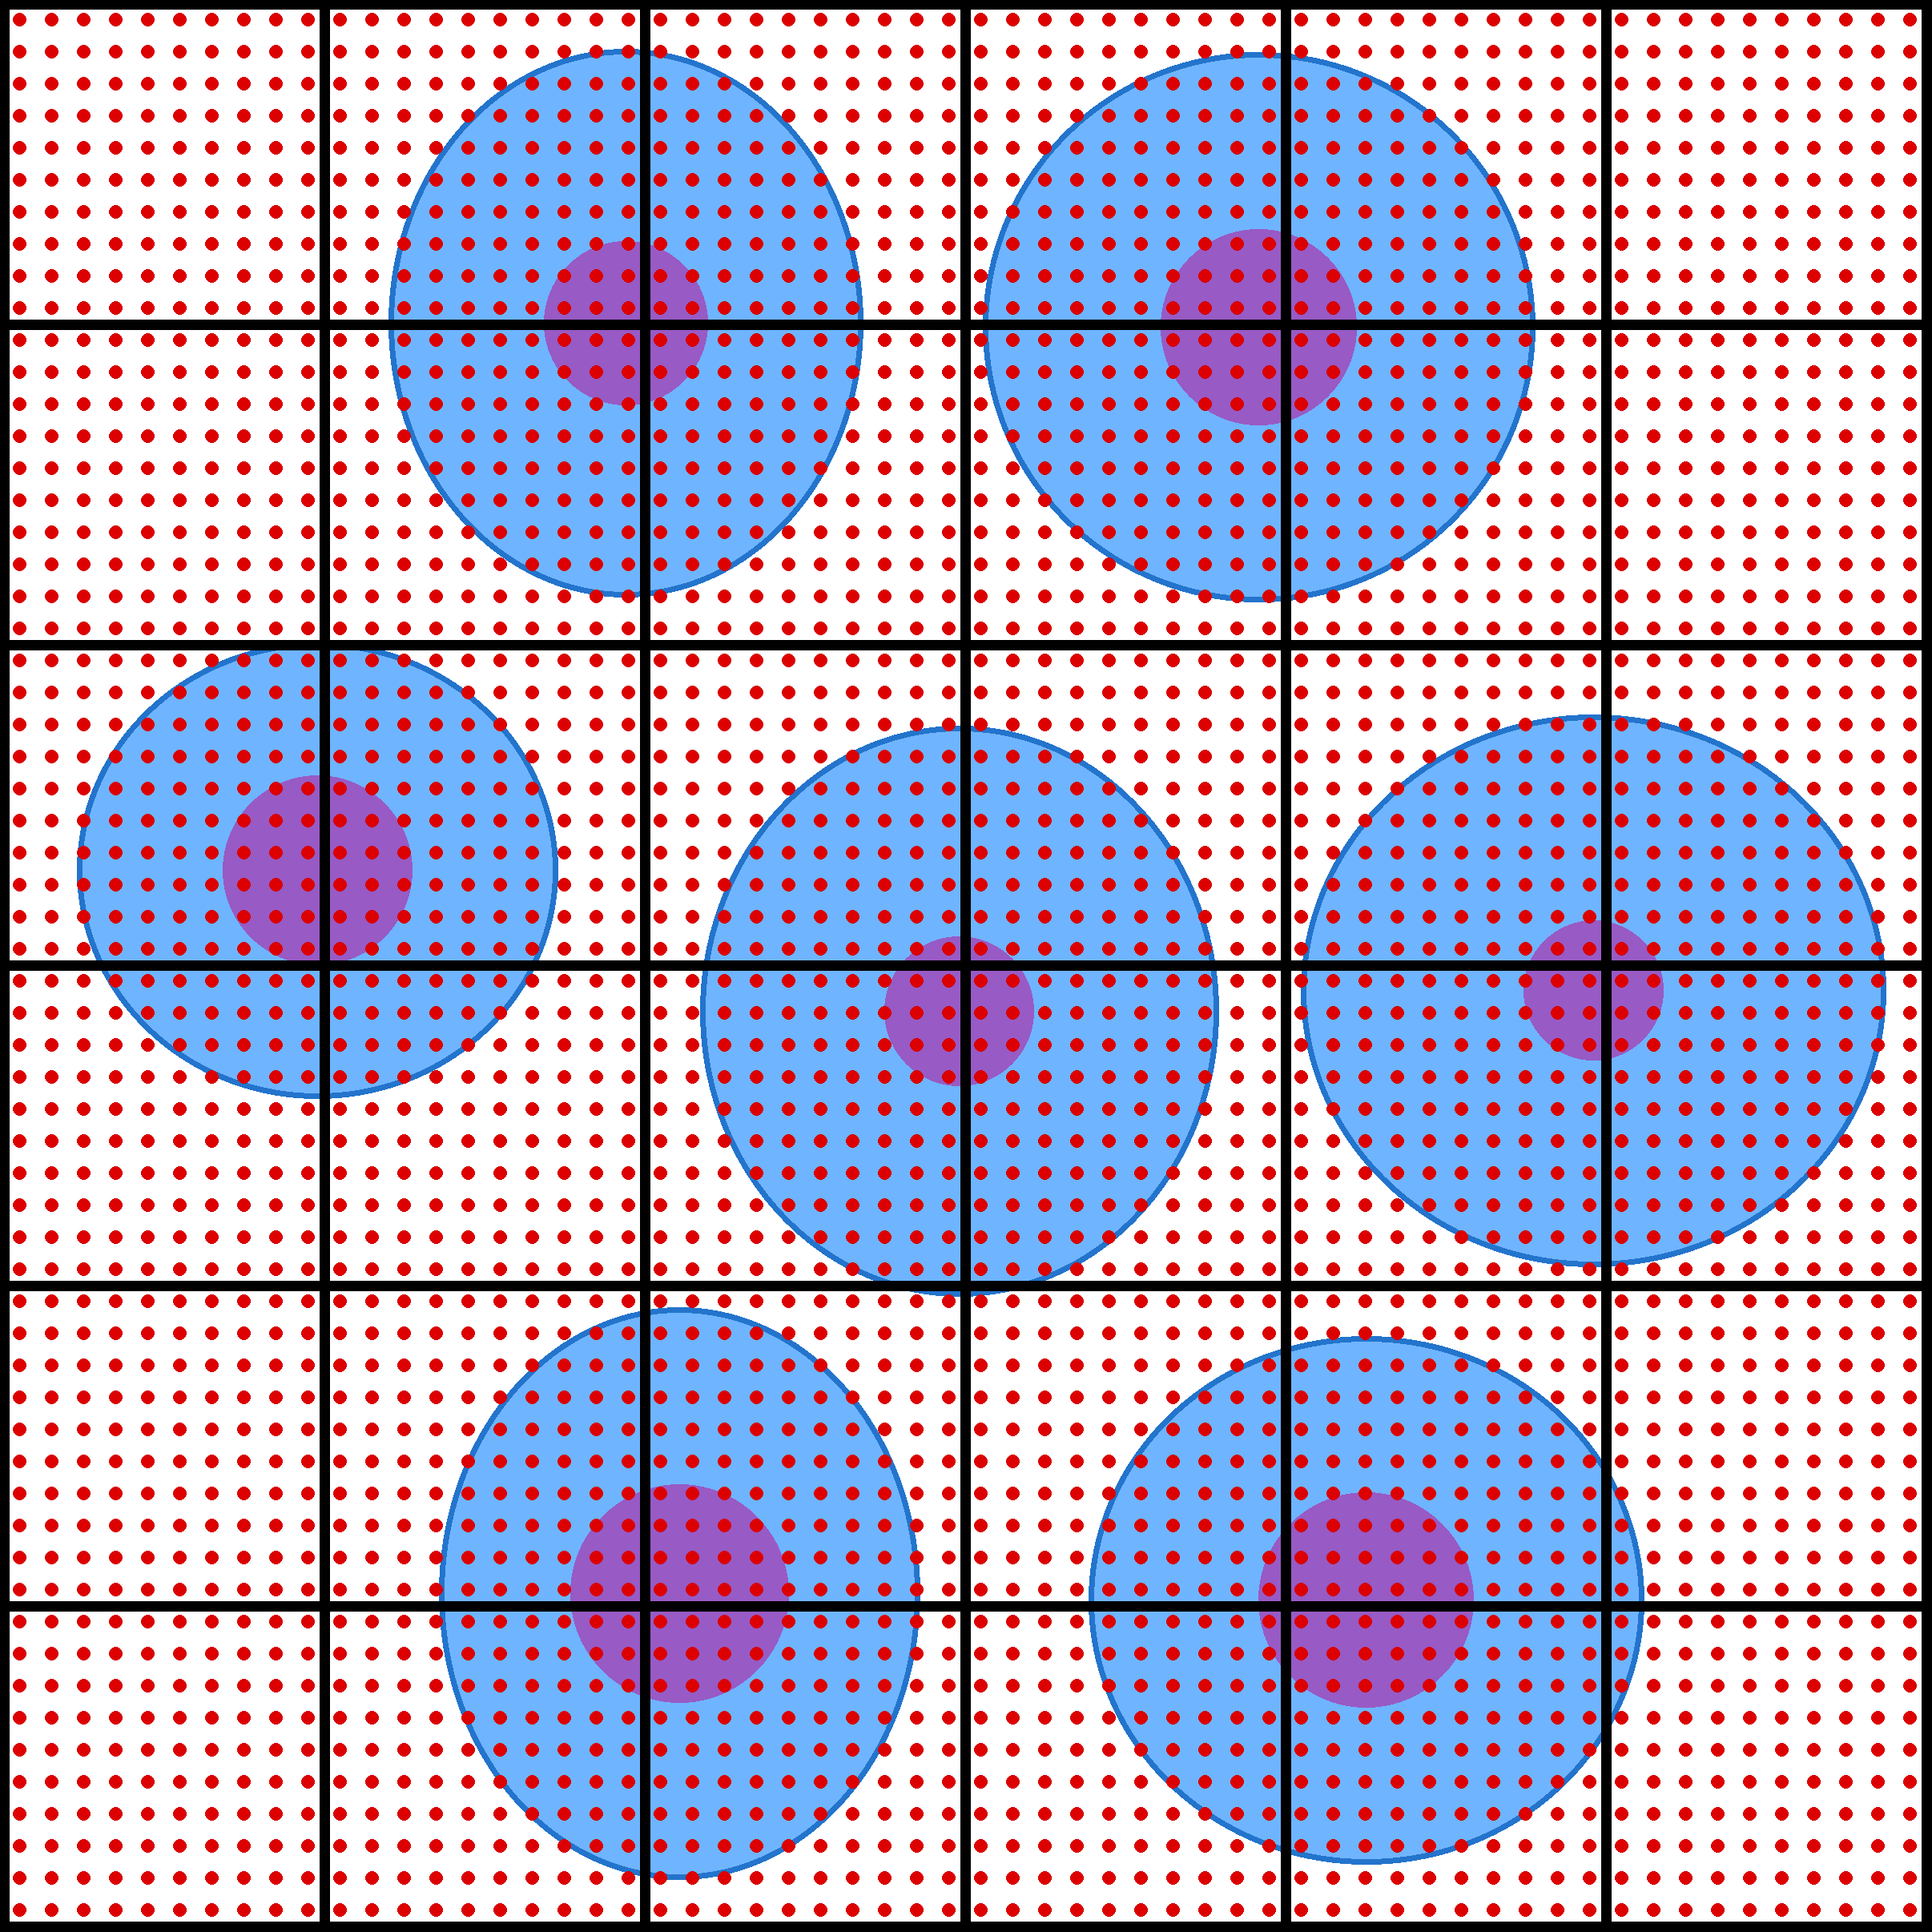

In [55]:
im, draw = draw_im(pos, sizes, SIZE, nuclei_sizes)
im, draw = draw_spots(im, draw, 20*2, diam = 8*2)
im, draw = draw_grids(im, draw, 200*2, 6*2)
im.save(os.path.join(output_dir, "spots_cells", "im5.png"))
im